In [56]:
import pandas as pd
import numpy as np
pd.options.display.max_columns=None
pd.options.display.max_rows=150
pd.options.display.max_colwidth = None
import seaborn as sns
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (15,8)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('sample_train_good_40k.csv')

In [3]:
df.sample(10)

Unnamed: 0  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
15879       75624       1         Cash loans           F            N   
21901      153919       0         Cash loans           M            N   
32581      270278       0         Cash loans           F            N   
25210      247099       0         Cash loans           F            N   
30112       38345       0         Cash loans           M            N   
35666      171078       0         Cash loans           F            N   
33575      141687       0         Cash loans           M            Y   
28053      223488       0    Revolving loans           F            N   
33254      218866       0         Cash loans           F            N   
39346       97994       0         Cash loans           F            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
15879               Y             1          157500.0    641173.5   
21901               N             0          121500.0    301500.0   
32581               N             0           54000.0    177768.0   
25210               Y             0          180000.0    495216.0   
30112               N             0          211500.0    229500.0   
35666               N             1          135000.0   1611072.0   
33575               Y             1          135000.0    148365.0   
28053               Y             0          157500.0    157500.0   
33254               Y             0          135000.0    254700.0   
39346               N             0           90000.0    239850.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
15879      21190.5         553500.0   Unaccompanied               Working   
21901      21978.0         301500.0          Family  Commercial associate   
32581      14175.0         135000.0   Unaccompanied             Pensioner   
25210      26995.5         427500.0   Unaccompanied               Working   
30112      11160.0         229500.0   Unaccompanied         State servant   
35666      42498.0        1440000.0   Unaccompanied         State servant   
33575      13608.0         135000.0   Unaccompanied  Commercial associate   
28053       7875.0         157500.0   Unaccompanied               Working   
33254      24808.5         225000.0   Unaccompanied             Pensioner   
39346      23494.5         225000.0          Family             Pensioner   

                 NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
15879  Secondary / secondary special             Separated   
21901               Higher education  Single / not married   
32581  Secondary / secondary special               Married   
25210               Higher education               Married   
30112  Secondary / secondary special  Single / not married   
35666               Higher education               Married   
33575               Higher education               Married   
28053              Incomplete higher        Civil marriage   
33254  Secondary / secondary special               Married   
39346  Secondary / secondary special             Separated   

         NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
15879    House / apartment                    0.018634      -16218   
21901         With parents                    0.018209       -9861   
32581    House / apartment                    0.014520      -22953   
25210    House / apartment                    0.022625      -14324   
30112    House / apartment                    0.072508      -10379   
35666  Municipal apartment                    0.002506      -14167   
33575    House / apartment                    0.025164      -10737   
28053    House / apartment                    0.024610      -17967   
33254    House / apartment                    0.009657      -24735   
39346    House / apartment                    0.031329      -24838   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
15879          -2715            -7569.0            -4303          Na

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

### Checking Null proprtions for Population and Samples

In [5]:
samp_null_per = df.isnull().sum()/df.shape[0]

In [6]:
df_pop = pd.read_csv(r'application_train.csv\application_train.csv')

In [7]:
df_pop.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [8]:
df_pop.drop('SK_ID_CURR',axis=1,inplace=True)

In [9]:
pop_null_per = df_pop.isnull().sum()/df_pop.shape[0]

In [10]:
pd.DataFrame({'pop':pop_null_per,'samp':samp_null_per})

pop      samp
TARGET                        0.000000  0.000000
NAME_CONTRACT_TYPE            0.000000  0.000000
CODE_GENDER                   0.000000  0.000000
FLAG_OWN_CAR                  0.000000  0.000000
FLAG_OWN_REALTY               0.000000  0.000000
CNT_CHILDREN                  0.000000  0.000000
AMT_INCOME_TOTAL              0.000000  0.000000
AMT_CREDIT                    0.000000  0.000000
AMT_ANNUITY                   0.000039  0.000050
AMT_GOODS_PRICE               0.000904  0.000875
NAME_TYPE_SUITE               0.004201  0.004450
NAME_INCOME_TYPE              0.000000  0.000000
NAME_EDUCATION_TYPE           0.000000  0.000000
NAME_FAMILY_STATUS            0.000000  0.000000
NAME_HOUSING_TYPE             0.000000  0.000000
REGION_POPULATION_RELATIVE    0.000000  0.000000
DAYS_BIRTH                    0.000000  0.000000
DAYS_EMPLOYED                 0.000000  0.000000
DAYS_REGISTRATION             0.000000  0.000000
DAYS_ID_PUBLISH               0.000000  0.000000
OWN_CAR_AGE                   0.659908  0.656350
FLAG_MOBIL                    0.000000  0.000000
FLAG_EMP_PHONE                0.000000  0.000000
FLAG_WORK_PHONE               0.000000  0.000000
FLAG_CONT_MOBILE              0.000000  0.000000
FLAG_PHONE                    0.000000  0.000000
FLAG_EMAIL                    0.000000  0.000000
OCCUPATION_TYPE               0.313455  0.314675
CNT_FAM_MEMBERS               0.000007  0.000000
REGION_RATING_CLIENT          0.000000  0.000000
REGION_RATING_CLIENT_W_CITY   0.000000  0.000000
WEEKDAY_APPR_PROCESS_START    0.000000  0.000000
HOUR_APPR_PROCESS_START       0.000000  0.000000
REG_REGION_NOT_LIVE_REGION    0.000000  0.000000
REG_REGION_NOT_WORK_REGION    0.000000  0.000000
LIVE_REGION_NOT_WORK_REGION   0.000000  0.000000
REG_CITY_NOT_LIVE_CITY        0.000000  0.000000
REG_CITY_NOT_WORK_CITY        0.000000  0.000000
LIVE_CITY_NOT_WORK_CITY       0.000000  0.000000
ORGANIZATION_TYPE             0.000000  0.000000
EXT_SOURCE_1                  0.563811  0.564900
EXT_SOURCE_2                  0.002146  0.002200
EXT_SOURCE_3                  0.198253  0.198125
APARTMENTS_AVG                0.507497  0.505150
BASEMENTAREA_AVG              0.585160  0.582400
YEARS_BEGINEXPLUATATION_AVG   0.487810  0.483925
YEARS_BUILD_AVG               0.664978  0.662575
COMMONAREA_AVG                0.698723  0.695575
ELEVATORS_AVG                 0.532960  0.529600
ENTRANCES_AVG                 0.503488  0.500875
FLOORSMAX_AVG                 0.497608  0.494800
FLOORSMIN_AVG                 0.678486  0.675800
LANDAREA_AVG                  0.593767  0.591525
LIVINGAPARTMENTS_AVG          0.683550  0.680800
LIVINGAREA_AVG                0.501933  0.498625
NONLIVINGAPARTMENTS_AVG       0.694330  0.691375
NONLIVINGAREA_AVG             0.551792  0.549250
APARTMENTS_MODE               0.507497  0.505150
BASEMENTAREA_MODE             0.585160  0.582400
YEARS_BEGINEXPLUATATION_MODE  0.487810  0.483925
YEARS_BUILD_MODE              0.664978  0.662575
COMMONAREA_MODE               0.698723  0.695575
ELEVATORS_MODE                0.532960  0.529600
ENTRANCES_MODE                0.503488  0.500875
FLOORSMAX_MODE                0.497608  0.494800
FLOORSMIN_MODE                0.678486  0.675800
LANDAREA_MODE                 0.593767  0.591525
LIVINGAPARTMENTS_MODE         0.683550  0.680800
LIVINGAREA_MODE               0.501933  0.498625
NONLIVINGAPARTMENTS_MODE      0.694330  0.691375
NONLIVINGAREA_MODE            0.551792  0.549250
APARTMENTS_MEDI               0.507497  0.505150
BASEMENTAREA_MEDI             0.585160  0.582400
YEARS_BEGINEXPLUATATION_MEDI  0.487810  0.483925
YEARS_BUILD_MEDI              0.664978  0.662575
COMMONAREA_MEDI               0.698723  0.695575
ELEVATORS_MEDI                0.532960  0.529600
ENTRANCES_MEDI                0.503488  0.500875
FLOORSMAX_MEDI                0.497608  0.494800
FLOORSMIN_MEDI                0.678486  0.675800
LANDAREA_MEDI                 0.593767  0.591525
LIVINGAPARTMENTS_

#### Proportions of Nulls are almost equal

### DataSet load, shape

In [11]:
df = pd.read_csv('sample_train_good_40k.csv')
df.head()

Unnamed: 0  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      204302       0         Cash loans           F            N   
1      105191       0         Cash loans           F            N   
2       86762       1         Cash loans           F            Y   
3       25721       0         Cash loans           M            Y   
4       36127       0         Cash loans           F            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             2          135000.0    269550.0      24853.5   
1               Y             0           81000.0    942300.0      27679.5   
2               N             2          135000.0   1113840.0      56871.0   
3               Y             0          180000.0    450000.0      38628.0   
4               N             0          180000.0    284400.0      15138.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         225000.0    Unaccompanied  Commercial associate   
1         675000.0    Unaccompanied               Working   
2         900000.0  Spouse, partner  Commercial associate   
3         450000.0    Unaccompanied               Working   
4         225000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
0  Secondary / secondary special               Married    House / apartment   
1  Secondary / secondary special               Married    House / apartment   
2  Secondary / secondary special               Married  Municipal apartment   
3  Secondary / secondary special  Single / not married    House / apartment   
4               Higher education  Single / not married         With parents   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.046220      -11779          -1907            -4774.0   
1                    0.020246      -19632          -8721            -8540.0   
2                    0.009657      -14586           -232            -8708.0   
3                    0.008575      -10052          -1416            -4581.0   
4                    0.019101      -13935          -4517            -7951.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -3127          NaN           1               1                0   
1            -3125          NaN           1               1                0   
2            -4374         22.0           1               1                0   
3             -177         11.0           1               1                0   
4            -4501         16.0           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           0           0     Sales staff              4.0   
1                 1           0           0     Secretaries              2.0   
2                 1           0           0      Core staff              4.0   
3                 1           0           0        Laborers              1.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     1                            1   
1                     3                            3   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                    TUESDAY                       14   
1                     MONDAY                       14   
2                  WEDNESDAY                       18   
3                   THURSDAY                       16   
4                   THURSDAY                       18   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0         

In [12]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
df.shape

(40000, 121)

### Column Descriptions

In [14]:
col_desc = pd.read_csv('HomeCredit_columns_description.csv',encoding='latin1')
col_desc.style.set_properties(**{'text-align':'right'})
col_desc[col_desc['Table']=='application_{train|test}.csv'][['Row','Description','Special']]

Row  \
0                      SK_ID_CURR   
1                          TARGET   
2              NAME_CONTRACT_TYPE   
3                     CODE_GENDER   
4                    FLAG_OWN_CAR   
5                 FLAG_OWN_REALTY   
6                    CNT_CHILDREN   
7                AMT_INCOME_TOTAL   
8                      AMT_CREDIT   
9                     AMT_ANNUITY   
10                AMT_GOODS_PRICE   
11                NAME_TYPE_SUITE   
12               NAME_INCOME_TYPE   
13            NAME_EDUCATION_TYPE   
14             NAME_FAMILY_STATUS   
15              NAME_HOUSING_TYPE   
16     REGION_POPULATION_RELATIVE   
17                     DAYS_BIRTH   
18                  DAYS_EMPLOYED   
19              DAYS_REGISTRATION   
20                DAYS_ID_PUBLISH   
21                    OWN_CAR_AGE   
22                     FLAG_MOBIL   
23                 FLAG_EMP_PHONE   
24                FLAG_WORK_PHONE   
25               FLAG_CONT_MOBILE   
26                     FLAG_PHONE   
27                     FLAG_EMAIL   
28                OCCUPATION_TYPE   
29                CNT_FAM_MEMBERS   
30           REGION_RATING_CLIENT   
31    REGION_RATING_CLIENT_W_CITY   
32     WEEKDAY_APPR_PROCESS_START   
33        HOUR_APPR_PROCESS_START   
34     REG_REGION_NOT_LIVE_REGION   
35     REG_REGION_NOT_WORK_REGION   
36    LIVE_REGION_NOT_WORK_REGION   
37         REG_CITY_NOT_LIVE_CITY   
38         REG_CITY_NOT_WORK_CITY   
39        LIVE_CITY_NOT_WORK_CITY   
40              ORGANIZATION_TYPE   
41                   EXT_SOURCE_1   
42                   EXT_SOURCE_2   
43                   EXT_SOURCE_3   
44                 APARTMENTS_AVG   
45               BASEMENTAREA_AVG   
46    YEARS_BEGINEXPLUATATION_AVG   
47                YEARS_BUILD_AVG   
48                 COMMONAREA_AVG   
49                  ELEVATORS_AVG   
50                  ENTRANCES_AVG   
51                  FLOORSMAX_AVG   
52                  FLOORSMIN_AVG   
53                   LANDAREA_AVG   
54           LIVINGAPARTMENTS_AVG   
55                 LIVINGAREA_AVG   
56        NONLIVINGAPARTMENTS_AVG   
57              NONLIVINGAREA_AVG   
58                APARTMENTS_MODE   
59              BASEMENTAREA_MODE   
60   YEARS_BEGINEXPLUATATION_MODE   
61               YEARS_BUILD_MODE   
62                COMMONAREA_MODE   
63                 ELEVATORS_MODE   
64                 ENTRANCES_MODE   
65                 FLOORSMAX_MODE   
66                 FLOORSMIN_MODE   
67                  LANDAREA_MODE   
68          LIVINGAPARTMENTS_MODE   
69                LIVINGAREA_MODE   
70       NONLIVINGAPARTMENTS_MODE   
71             NONLIVINGAREA_MODE   
72                APARTMENTS_MEDI   
73              BASEMENTAREA_MEDI   
74   YEARS_BEGINEXPLUATATION_MEDI   
75               YEARS_BUILD_MEDI   
76                COMMONAREA_MEDI   
77                 ELEVATORS_MEDI   
78                 ENTRANCES_MEDI   
79                 FLOORSMAX_MEDI   
80                 FLOORSMIN_MEDI   
81                  LANDAREA_MEDI   
82          LIVINGAPARTMENTS_MEDI   
83                LIVINGAREA_MEDI   
84       NONLIVINGAPARTMENTS_MEDI   
85             NONLIVINGAREA_MEDI   
86             FONDKAPREMONT_MODE   
87                 HOUSETYPE_MODE   
88                 TOTALAREA_MODE   
89             WALLSMATERIAL_MODE   
90            EMERGENCYSTATE_MODE   
91       OBS_30_CNT_SOCIAL_CIRCLE   
92       DEF_30_CNT_SOCIAL_CIRCLE   
93       OBS_60_CNT_SOCIAL_CIRCLE   
94       DEF_60_CNT_SOCIAL_CIRCLE   
95         DAYS_LAST_PHONE_CHANGE   
96                FLAG_DOCUMENT_2   
97                FLAG_DOCUMENT_3   
98                FLAG_DOCUMENT_4   
99                FLAG_DOCUMENT_5   
100               FLAG_DOCUMENT_6   
101               FLAG_DOCUMENT_7   
102               FLAG_DOCUMENT_8   
103               FLAG_DOCUMENT_9   
104              FLAG_DOCUMENT_10   
105              FLAG_DOCUMENT_11   
106              FLAG_DOCUMENT_12   
107              FLAG_DOCUMENT_13 

### Identifying Numerical and Categorical Columns

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 36.9+ MB


In [16]:
dtypes = df.apply(lambda col: col.dtype)
null_count = df.isnull().sum()
nuniques = df.apply(lambda col:col.nunique())

df_info = pd.DataFrame({'dtypes':dtypes,'null_count':null_count,'nuniques':nuniques})
df_info

dtypes  null_count  nuniques
TARGET                          int64           0         2
NAME_CONTRACT_TYPE             object           0         2
CODE_GENDER                    object           0         3
FLAG_OWN_CAR                   object           0         2
FLAG_OWN_REALTY                object           0         2
CNT_CHILDREN                    int64           0        10
AMT_INCOME_TOTAL              float64           0       647
AMT_CREDIT                    float64           0      3118
AMT_ANNUITY                   float64           2      8138
AMT_GOODS_PRICE               float64          35       472
NAME_TYPE_SUITE                object         178         7
NAME_INCOME_TYPE               object           0         8
NAME_EDUCATION_TYPE            object           0         5
NAME_FAMILY_STATUS             object           0         5
NAME_HOUSING_TYPE              object           0         6
REGION_POPULATION_RELATIVE    float64           0        80
DAYS_BIRTH                      int64           0     14932
DAYS_EMPLOYED                   int64           0      7475
DAYS_REGISTRATION             float64           0     12094
DAYS_ID_PUBLISH                 int64           0      5665
OWN_CAR_AGE                   float64       26254        49
FLAG_MOBIL                      int64           0         1
FLAG_EMP_PHONE                  int64           0         2
FLAG_WORK_PHONE                 int64           0         2
FLAG_CONT_MOBILE                int64           0         2
FLAG_PHONE                      int64           0         2
FLAG_EMAIL                      int64           0         2
OCCUPATION_TYPE                object       12587        18
CNT_FAM_MEMBERS               float64           0        11
REGION_RATING_CLIENT            int64           0         3
REGION_RATING_CLIENT_W_CITY     int64           0         3
WEEKDAY_APPR_PROCESS_START     object           0         7
HOUR_APPR_PROCESS_START         int64           0        24
REG_REGION_NOT_LIVE_REGION      int64           0         2
REG_REGION_NOT_WORK_REGION      int64           0         2
LIVE_REGION_NOT_WORK_REGION     int64           0         2
REG_CITY_NOT_LIVE_CITY          int64           0         2
REG_CITY_NOT_WORK_CITY          int64           0         2
LIVE_CITY_NOT_WORK_CITY         int64           0         2
ORGANIZATION_TYPE              object           0        58
EXT_SOURCE_1                  float64       22596     17054
EXT_SOURCE_2                  float64          88     32699
EXT_SOURCE_3                  float64        7925       728
APARTMENTS_AVG                float64       20206      1357
BASEMENTAREA_AVG              float64       23296      2613
YEARS_BEGINEXPLUATATION_AVG   float64       19357       167
YEARS_BUILD_AVG               float64       26503       133
COMMONAREA_AVG                float64       27823      1828
ELEVATORS_AVG                 float64       21184       158
ENTRANCES_AVG                 float64       20035       166
FLOORSMAX_AVG                 float64       19792       211
FLOORSMIN_AVG                 float64       27032       159
LANDAREA_AVG                  float64       23661      2361
LIVINGAPARTMENTS_AVG          float64       27232      1057
LIVINGAREA_AVG                float64       19945      3504
NONLIVINGAPARTMENTS_AVG       float64       27655       186
NONLIVINGAREA_AVG             float64       21970      1858
APARTMENTS_MODE               float64       20206       605
BASEMENTAREA_MODE             float64       23296      2646
YEARS_BEGINEXPLUATATION_MODE  float64       19357       157
YEARS_BUILD_MODE              float64       26503       135
COMMONAREA_MODE               float64       27823      1788
ELEVATORS_MODE                float64       21184        26
ENTRANCES_MODE                float64       20035        30
FLOORSMAX_MODE                float64       19792        25
FLOORSMIN_MODE                float64       27032        25
LANDAREA_MO

In [17]:
df.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       0         Cash loans           F            N               Y   
1       0         Cash loans           F            N               Y   
2       1         Cash loans           F            Y               N   
3       0         Cash loans           M            Y               Y   
4       0         Cash loans           F            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             2          135000.0    269550.0      24853.5         225000.0   
1             0           81000.0    942300.0      27679.5         675000.0   
2             2          135000.0   1113840.0      56871.0         900000.0   
3             0          180000.0    450000.0      38628.0         450000.0   
4             0          180000.0    284400.0      15138.0         225000.0   

   NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0    Unaccompanied  Commercial associate  Secondary / secondary special   
1    Unaccompanied               Working  Secondary / secondary special   
2  Spouse, partner  Commercial associate  Secondary / secondary special   
3    Unaccompanied               Working  Secondary / secondary special   
4    Unaccompanied               Working               Higher education   

     NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0               Married    House / apartment                    0.046220   
1               Married    House / apartment                    0.020246   
2               Married  Municipal apartment                    0.009657   
3  Single / not married    House / apartment                    0.008575   
4  Single / not married         With parents                    0.019101   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -11779          -1907            -4774.0            -3127          NaN   
1      -19632          -8721            -8540.0            -3125          NaN   
2      -14586           -232            -8708.0            -4374         22.0   
3      -10052          -1416            -4581.0             -177         11.0   
4      -13935          -4517            -7951.0            -4501         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0     Sales staff              4.0                     1   
1           0     Secretaries              2.0                     3   
2           0      Core staff              4.0                     2   
3           0        Laborers              1.0                     2   
4           0      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            1                    TUESDAY   
1                            3                     MONDAY   
2                            2                  WEDNESDAY   
3                            2                   THURSDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       14                           0   
1                       14                           0   
2                       18                           0   
3                       16                           0   
4                       18                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0 

In [18]:
num_cat_col = df_info[(df_info['dtypes']!='object')&(df_info['nuniques']<5)].index
num_col = df_info[(df_info['dtypes']!='object')&(df_info['nuniques']>=5)].index
cat_col = df_info[df_info['dtypes']=='object'].index

In [19]:
len(num_col)+len(cat_col)+len(num_cat_col)

121

### Univariante Analysis

#### Numerical columns

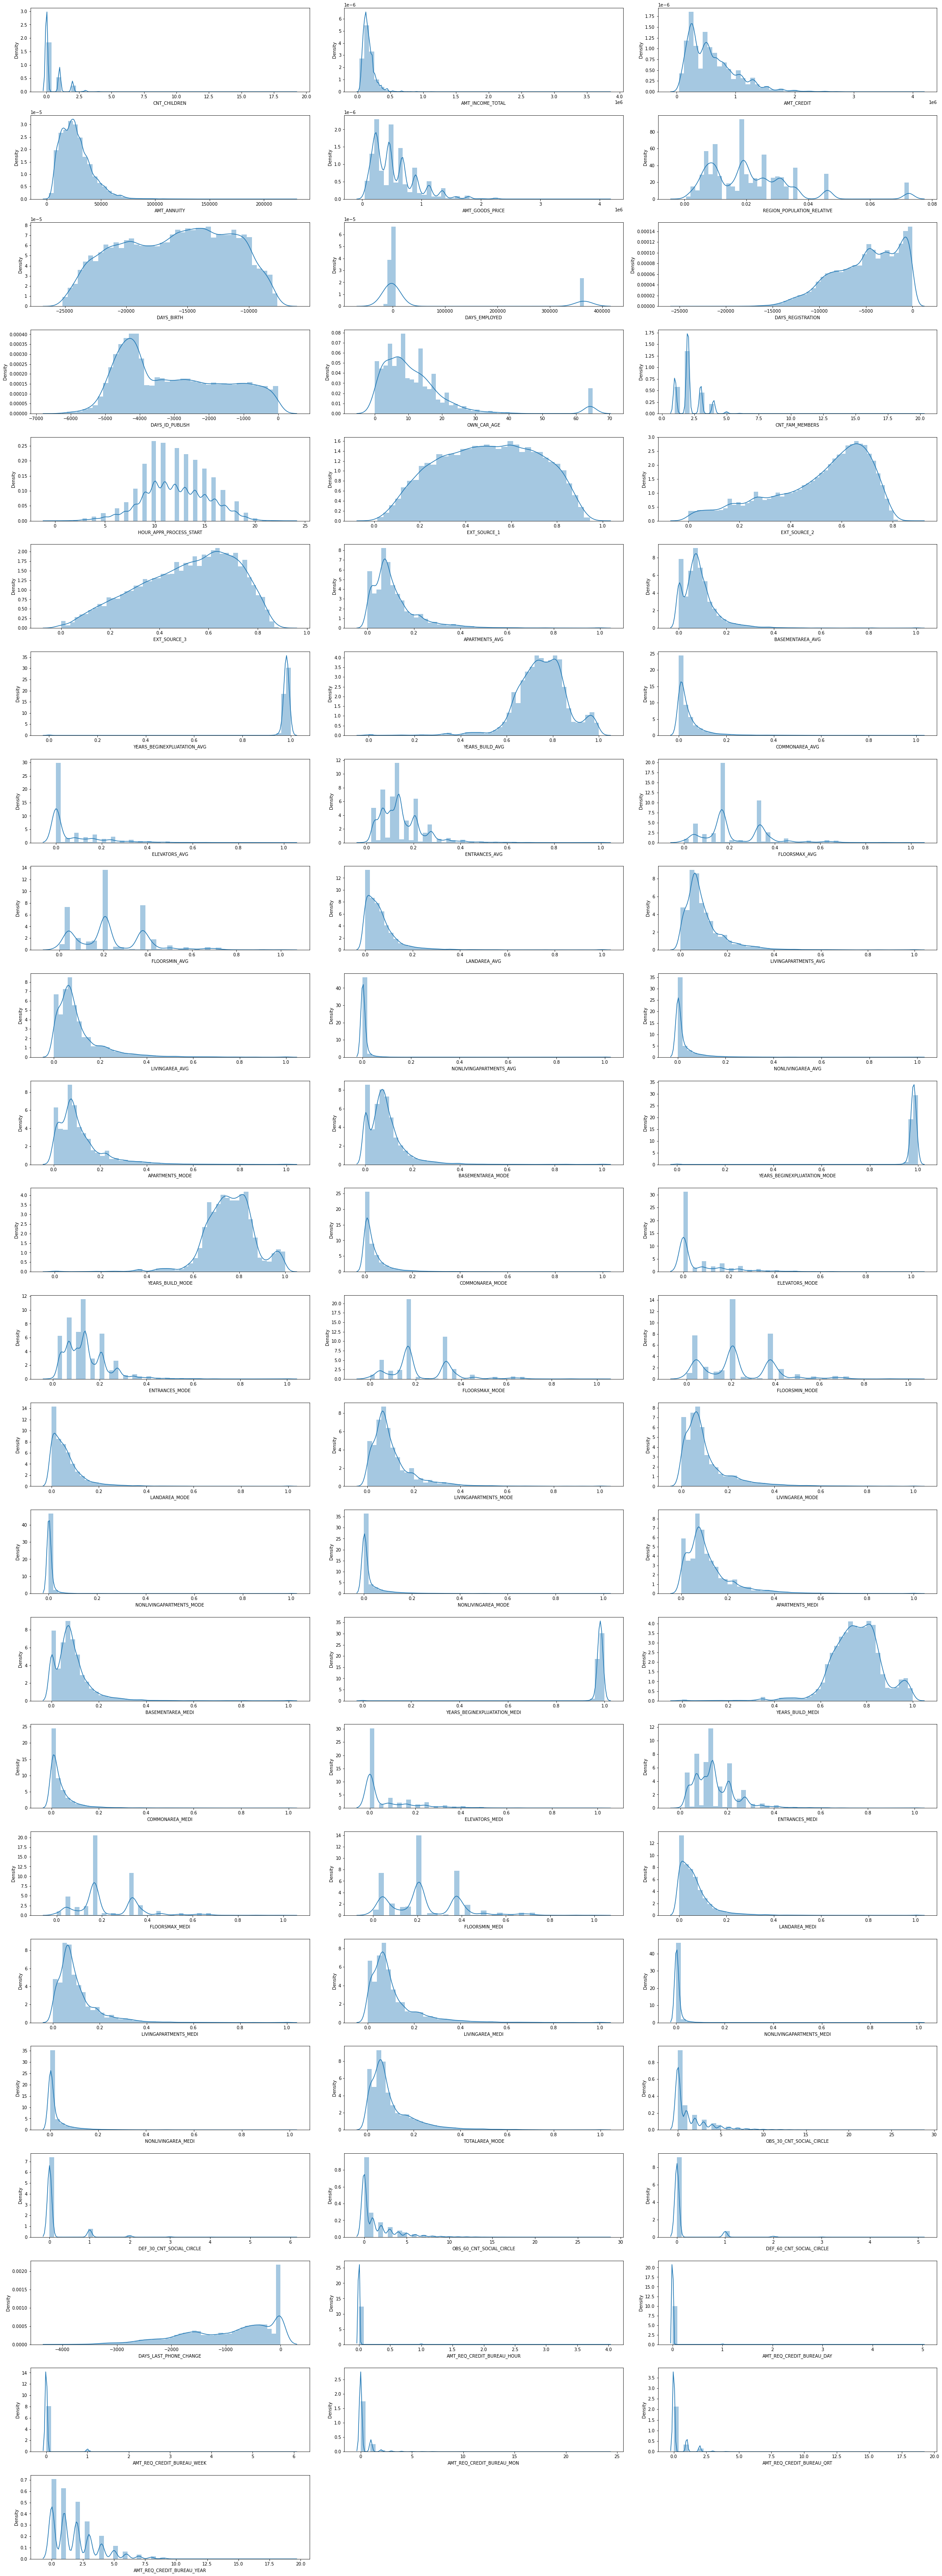

In [20]:
plt.figure(figsize=(30,85))
cols= num_col
it=1
for i in cols:
    plt.subplot(25,3,it)
    sns.distplot(df[i])
    it+=1
plt.tight_layout()
plt.show()

In [21]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

### Univariate Analysis : TARGET

In [22]:
df['TARGET'].value_counts()

0    36730
1     3270
Name: TARGET, dtype: int64

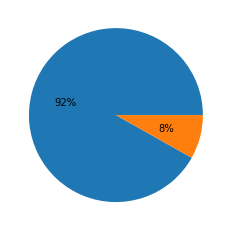

In [23]:
plt.pie(df['TARGET'].value_counts(),  autopct='%.0f%%')
plt.show()

### Univariate Analysis : NAME_CONTRACT_TYPE

In [24]:
df['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         36189
Revolving loans     3811
Name: NAME_CONTRACT_TYPE, dtype: int64

In [25]:
count=round(df['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100,2)

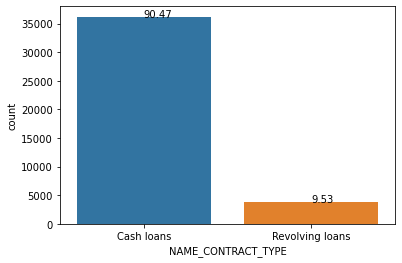

In [26]:
sns.countplot(df['NAME_CONTRACT_TYPE'])
labels=['Cash loans','Revolving loans']
x=[0,1]

plt.text(x=0,y=36189,s=count[0])
plt.text(x=1,y=3811,s=count[1])
plt.xticks(x,labels)
plt.show()

### Univariate Analysis : CODE_GENDER

In [27]:
df['CODE_GENDER'].value_counts()

F      26252
M      13747
XNA        1
Name: CODE_GENDER, dtype: int64

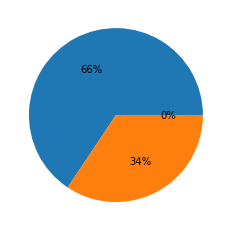

In [28]:
plt.pie(df['CODE_GENDER'].value_counts(),  autopct='%.0f%%')
plt.show()

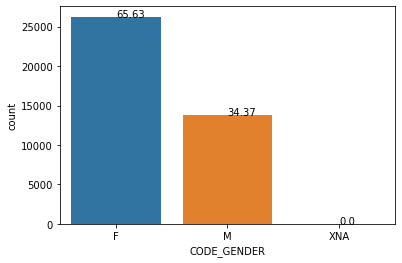

In [29]:
count=round(df['CODE_GENDER'].value_counts(normalize=True)*100,2)

sns.countplot(df['CODE_GENDER'])
labels=['F','M', 'XNA']
x=[0,1,2]

plt.text(x=0,y=26252,s=count[0])
plt.text(x=1,y=13747,s=count[1])
plt.text(x=2,y=1,s=count[2])

plt.xticks(x,labels)
plt.show()

In [30]:
num_col

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_M

In [31]:
cat_col

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

### NAME_INCOME_TYPE 

In [32]:
df['NAME_INCOME_TYPE'].value_counts()

Working                 20652
Commercial associate     9229
Pensioner                7174
State servant            2938
Student                     4
Businessman                 1
Unemployed                  1
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64

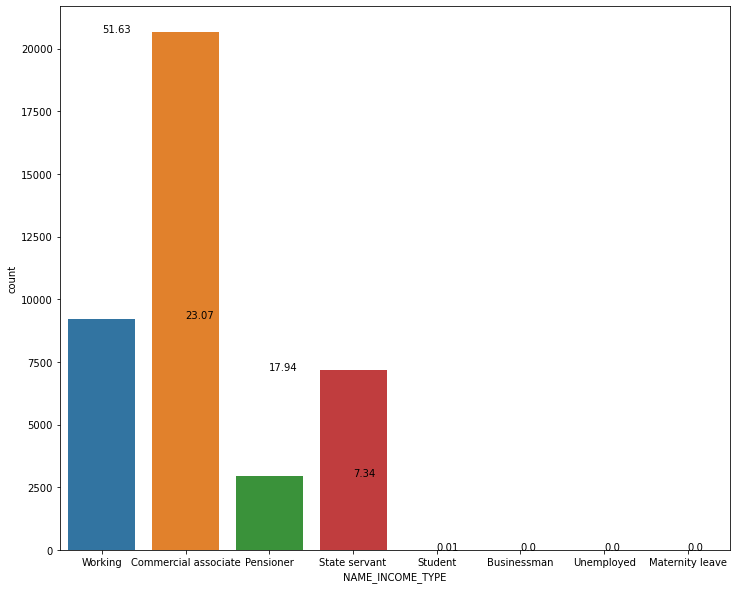

In [33]:
plt.figure(figsize=(12,10))

count=round(df['NAME_INCOME_TYPE'].value_counts(normalize=True)*100,2)

sns.countplot(df['NAME_INCOME_TYPE'])
labels=['Working','Commercial associate','Pensioner','State servant','Student','Businessman','Unemployed','Maternity leave']
x=[0,1,2,3,4,5,6,7]

plt.text(x=0,y=20652,s=count[0])
plt.text(x=1,y=9229,s=count[1])
plt.text(x=2,y=7174,s=count[2])
plt.text(x=3,y=2938,s=count[3])
plt.text(x=4,y=4,s=count[4])
plt.text(x=5,y=1,s=count[5])
plt.text(x=6,y=1,s=count[6])
plt.text(x=7,y=1,s=count[7])

plt.xticks(x,labels)
plt.show()

### numeric:

In [34]:
print(num_col)

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_M

### CNT_CHILDREN

In [35]:
df['CNT_CHILDREN'].value_counts()

0     27927
1      8065
2      3469
3       467
4        58
5         7
6         4
19        1
12        1
9         1
Name: CNT_CHILDREN, dtype: int64

<AxesSubplot:xlabel='CNT_CHILDREN'>

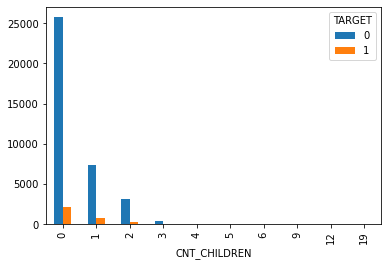

In [36]:
pd.crosstab(df['CNT_CHILDREN'], df['TARGET']).plot(kind='bar')

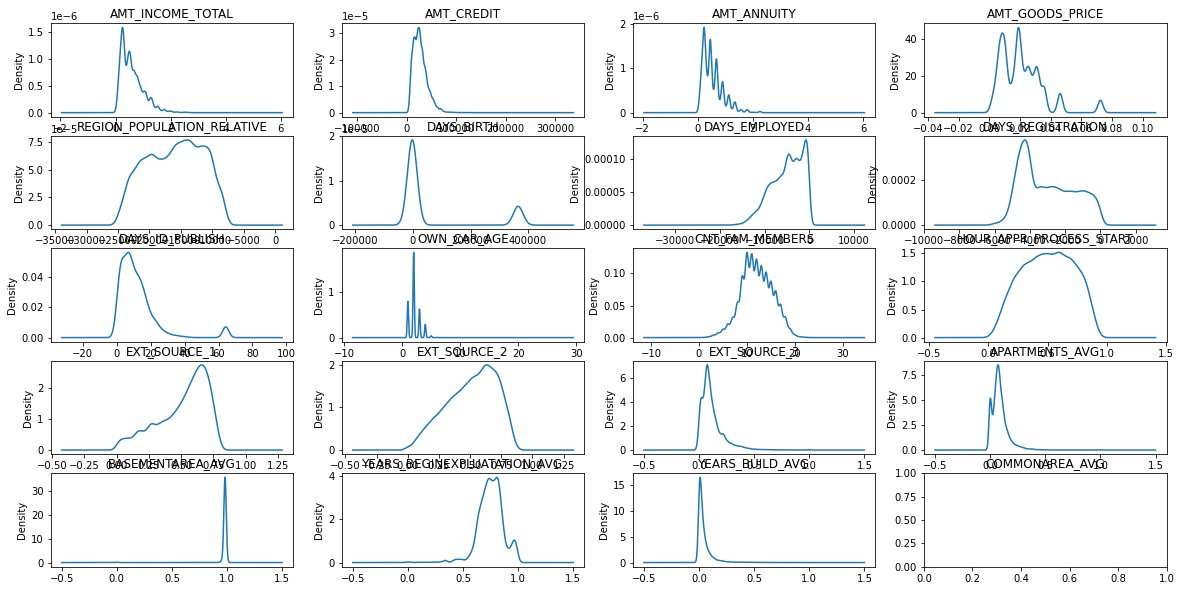

In [37]:
t =['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',]
c=1
plt.figure(figsize=(20,10))

for i in t:
    df[i].plot(kind='kde')
    plt.subplot(5,4,c)
    plt.title(i)
    c+=1
plt.tight_layout
plt.show()

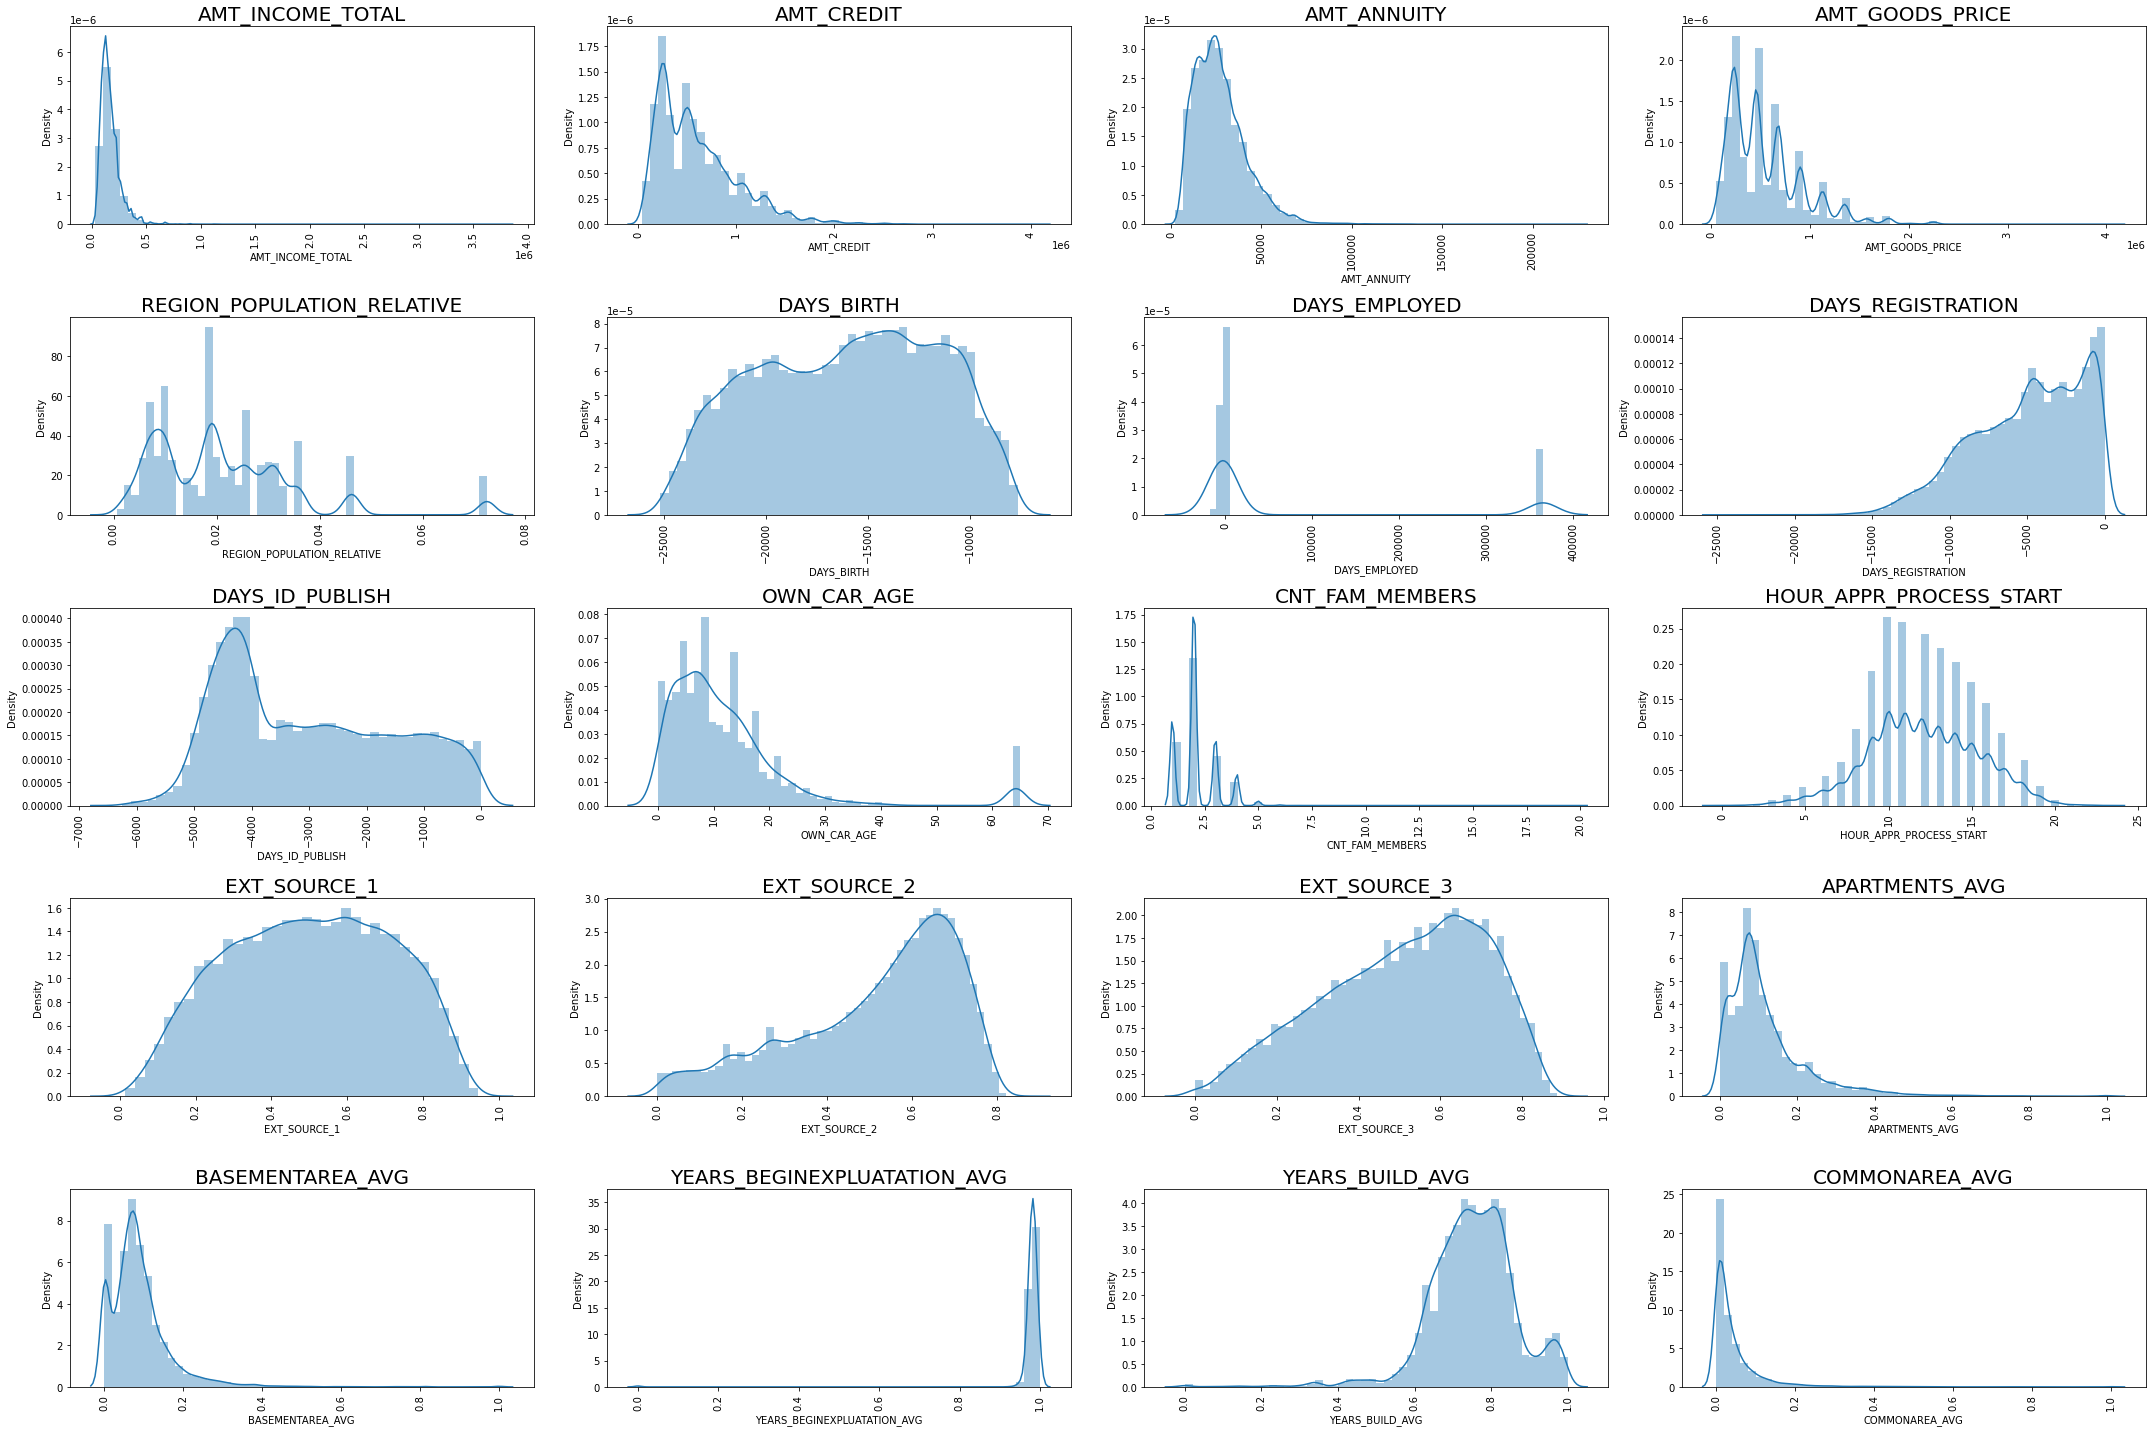

In [38]:
#numeric plot without 'hue'

plt.figure(figsize=(30,20))
cols=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',]
it=1
for i in cols:
    plt.subplot(5,4,it)
    sns.distplot(df[i])
    plt.title(i,fontsize=20)
    plt.xticks(rotation=90)
    it+=1
    
plt.tight_layout()
plt.show()

<Figure size 2160x1440 with 0 Axes>

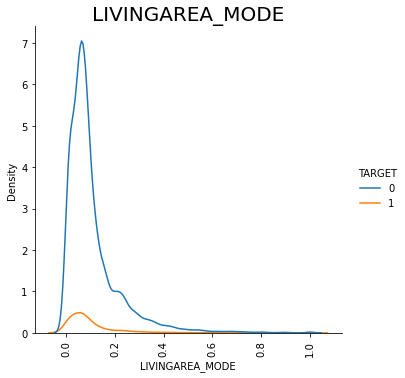

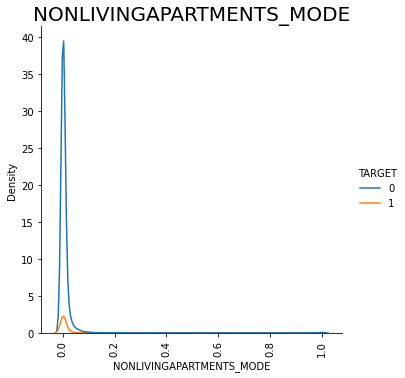

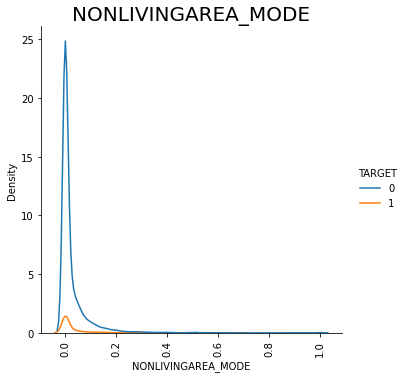

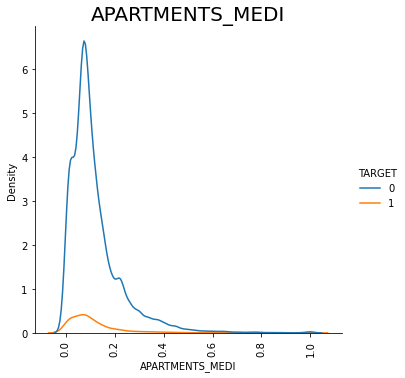

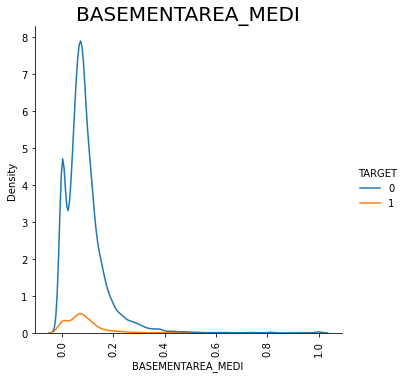

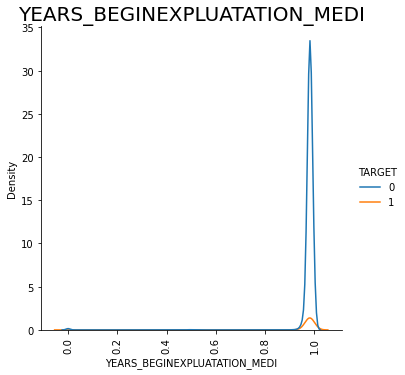

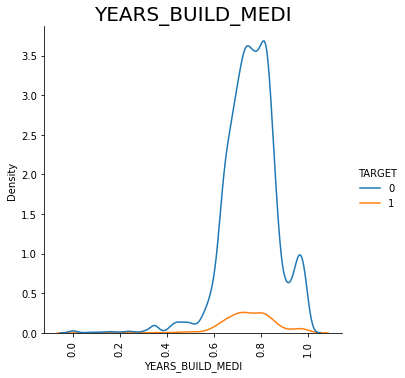

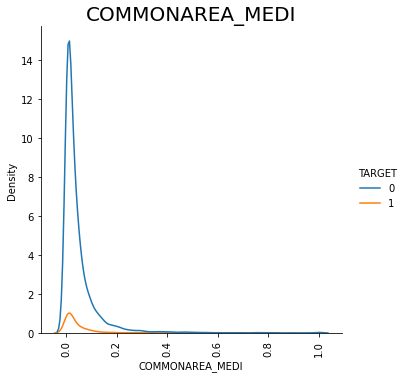

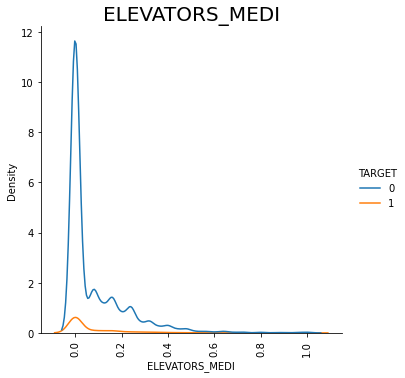

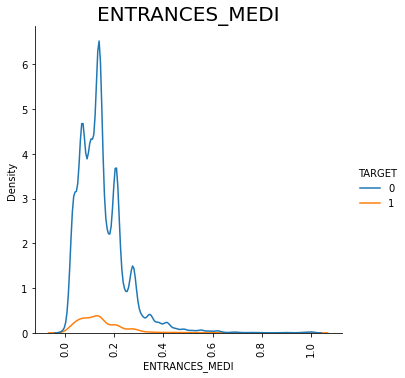

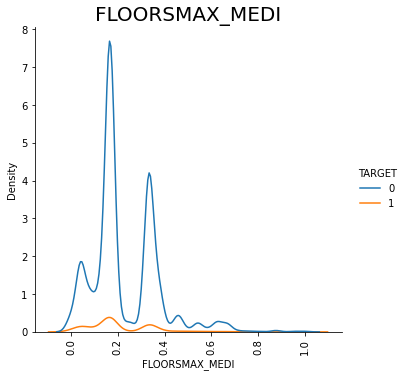

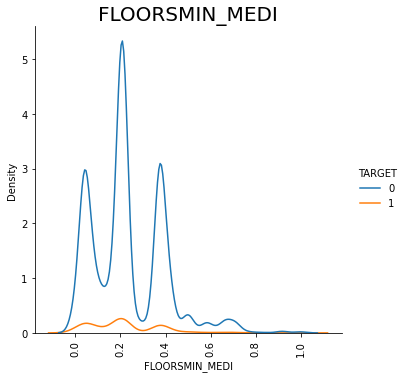

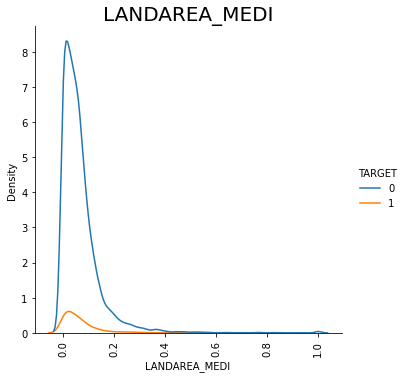

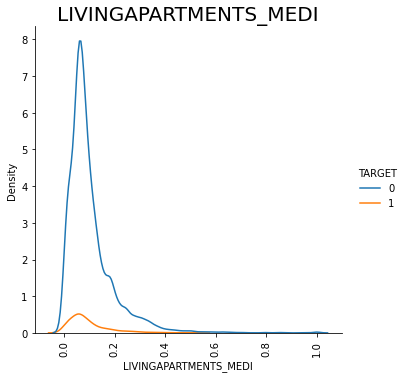

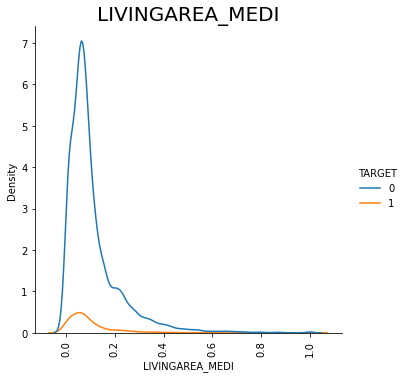

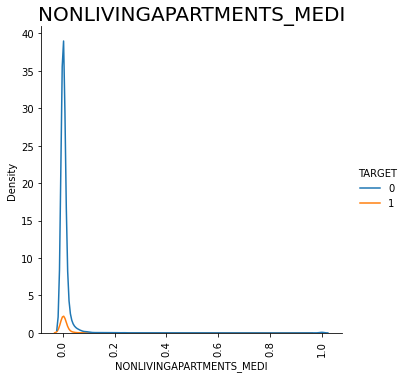

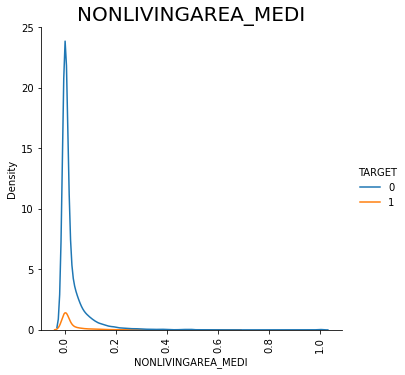

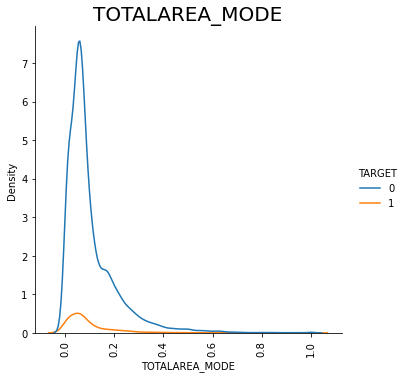

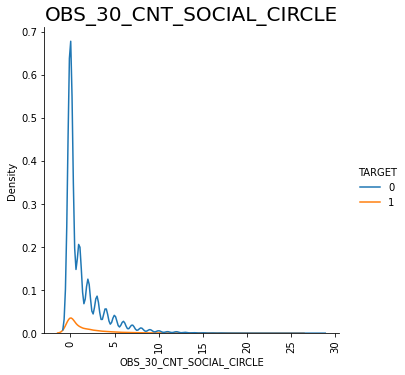

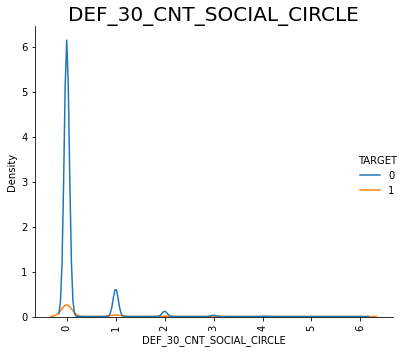

In [39]:
#numeric plots with 'hue'

plt.figure(figsize=(30,20))
cols=['LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE']
it=1
for i in cols:
    sns.displot(data=df, x=i, hue='TARGET',kind='kde')
    plt.title(i,fontsize=20)
    plt.xticks(rotation=90)
    
    it+=1
    
plt.tight_layout()
plt.show()

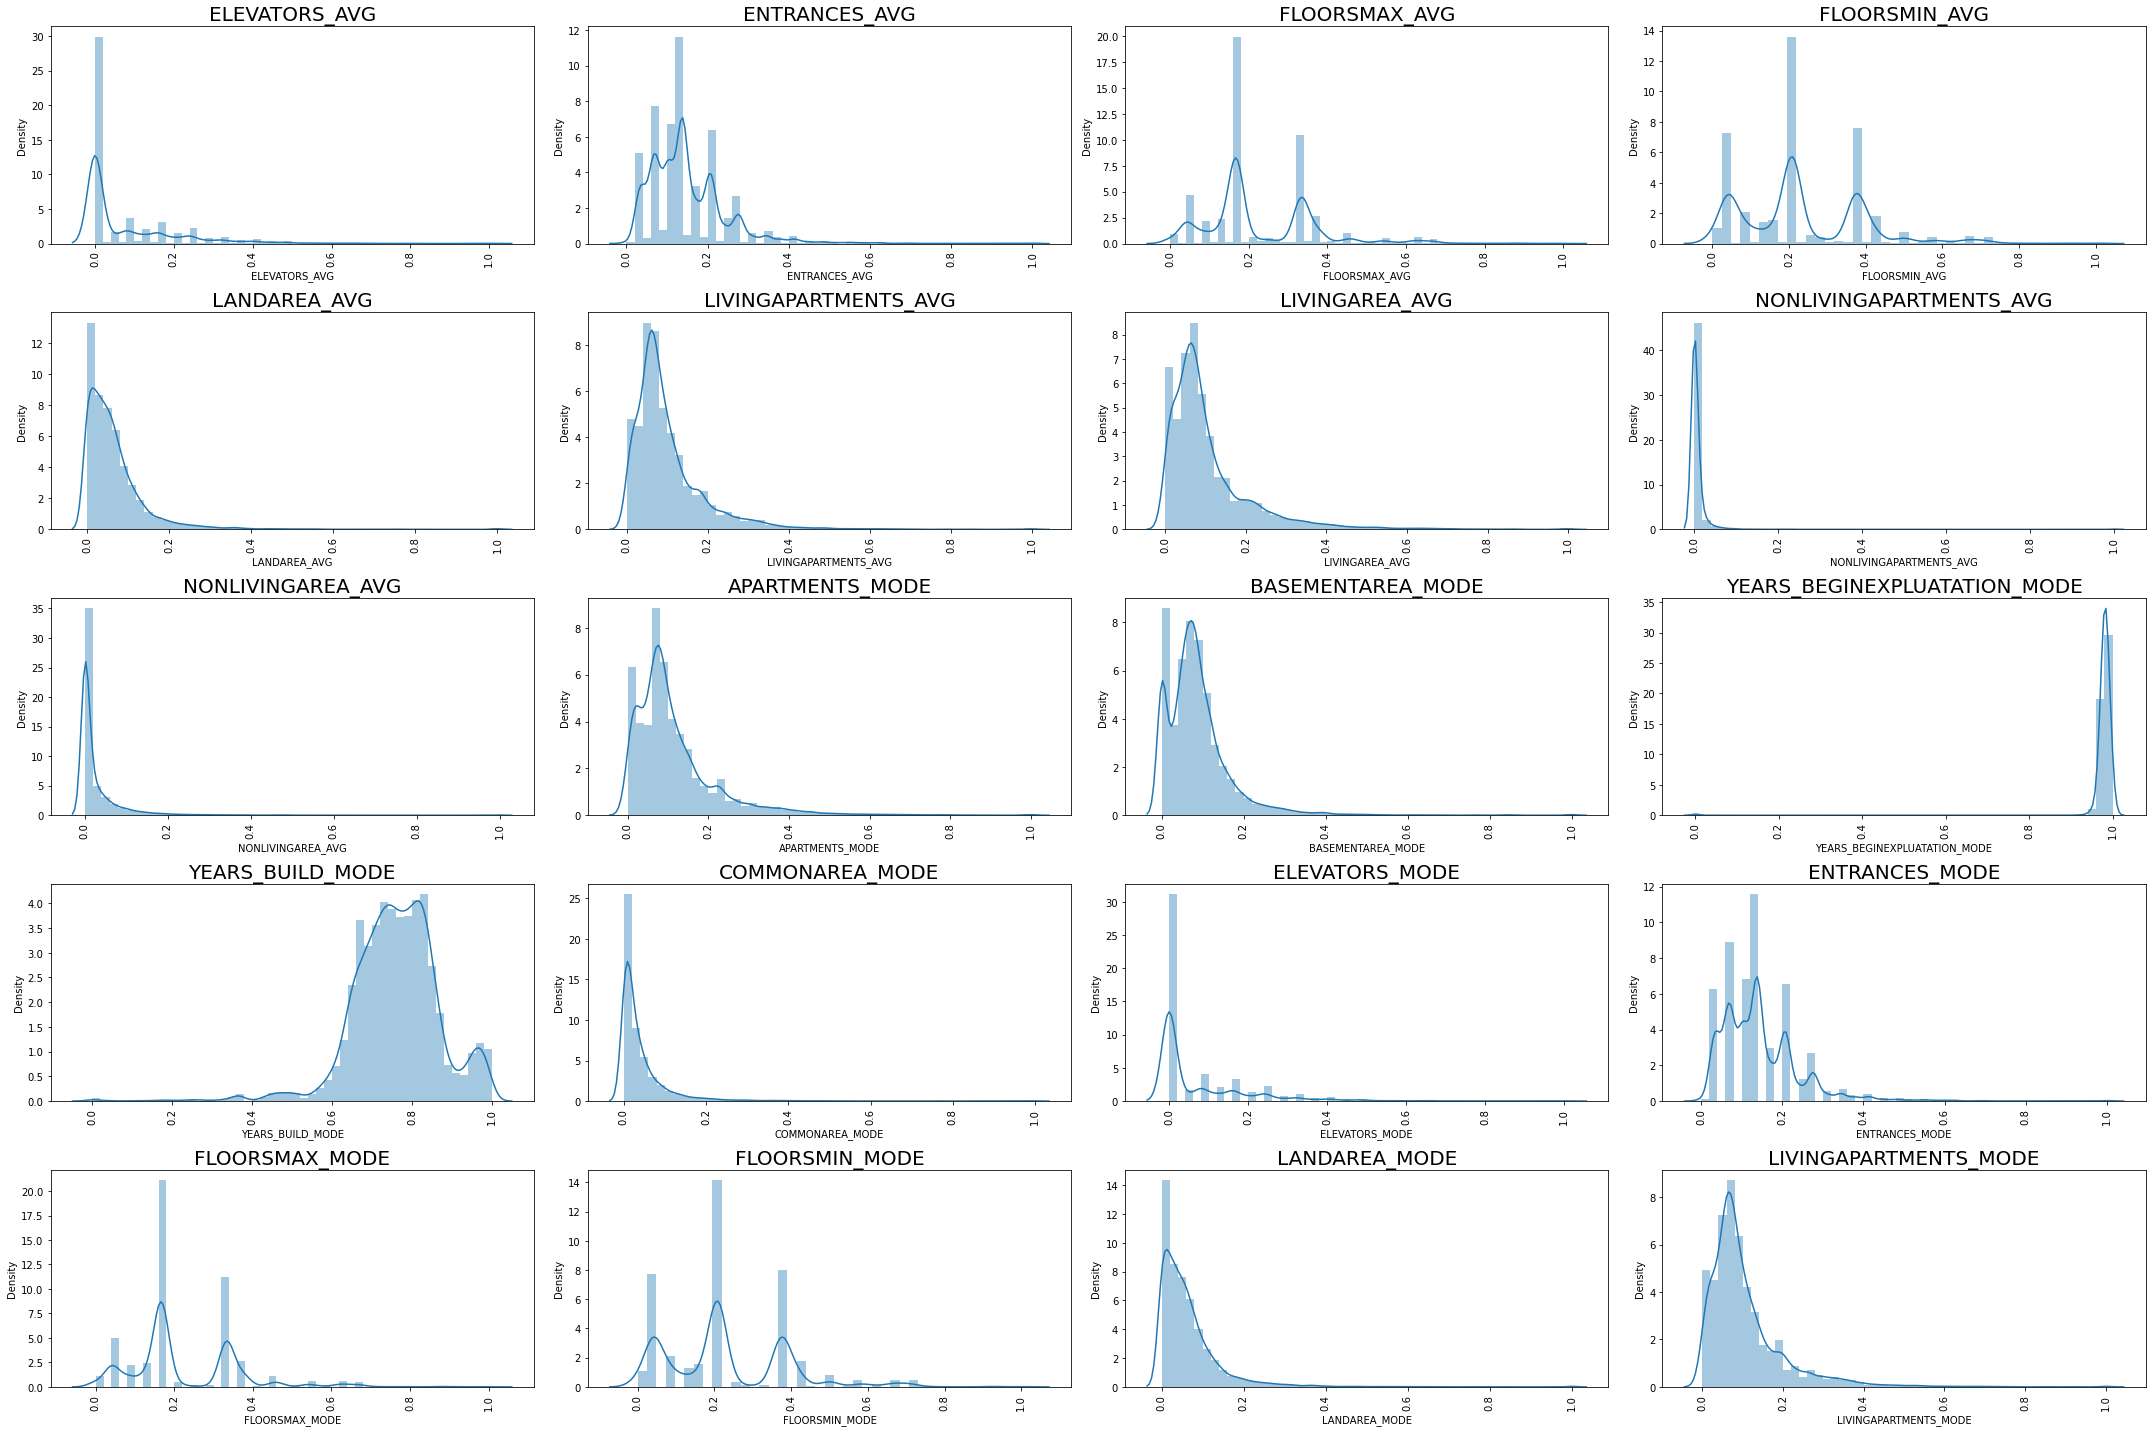

In [40]:
#numeric plots without 'hue'

plt.figure(figsize=(30,20))
cols=['ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE']
it=1
for i in cols:
    plt.subplot(5,4,it)
    sns.distplot(df[i])
    plt.title(i,fontsize=20)
    plt.xticks(rotation=90)
    it+=1
    
plt.tight_layout()
plt.show()

<Figure size 2160x1440 with 0 Axes>

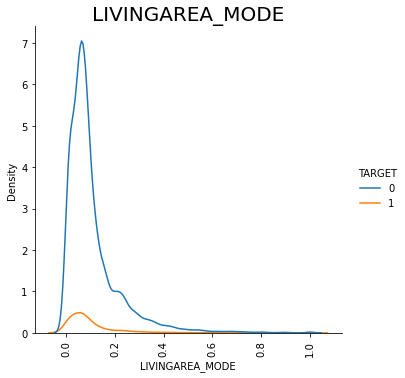

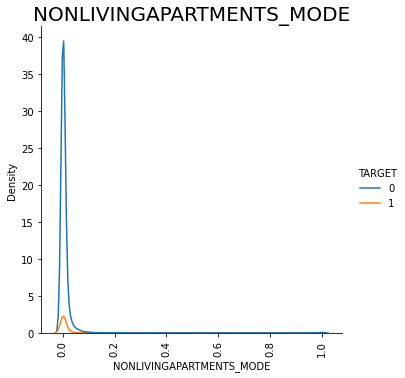

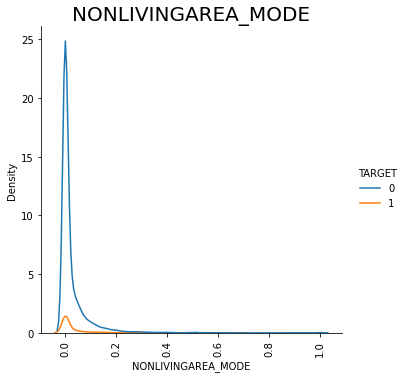

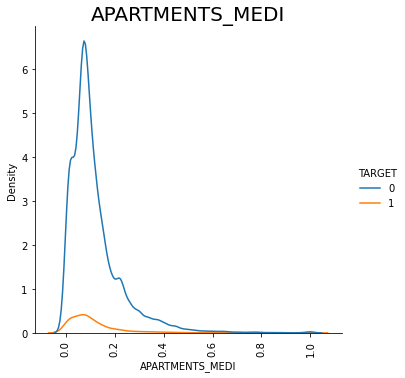

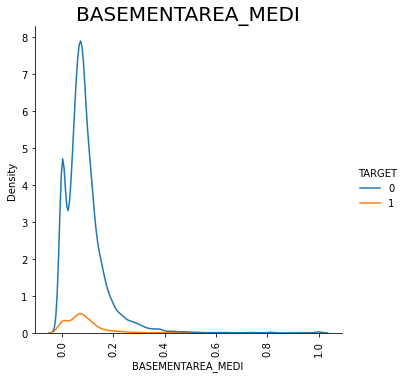

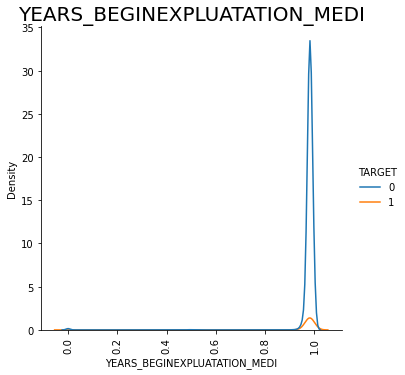

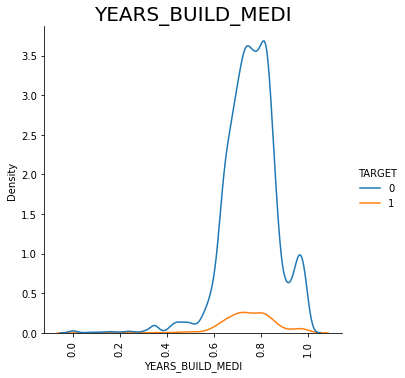

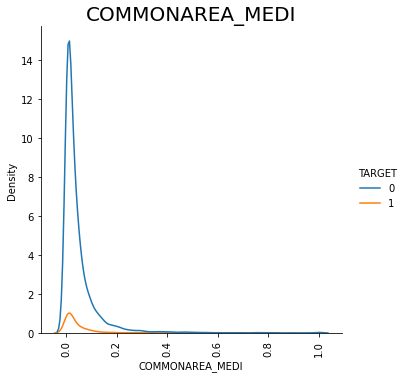

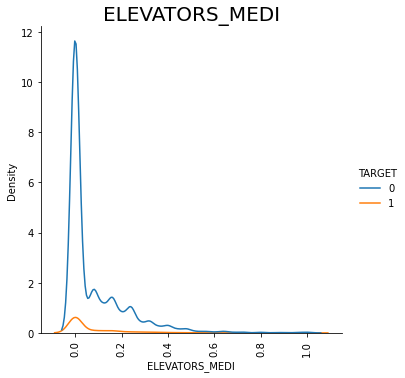

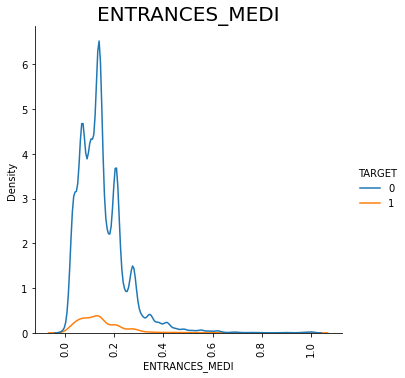

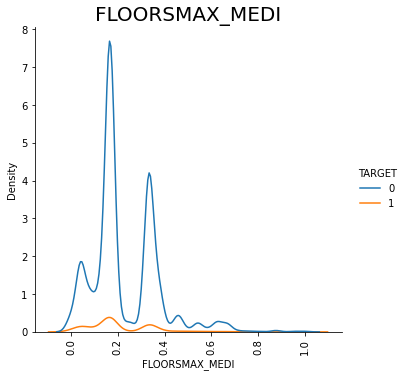

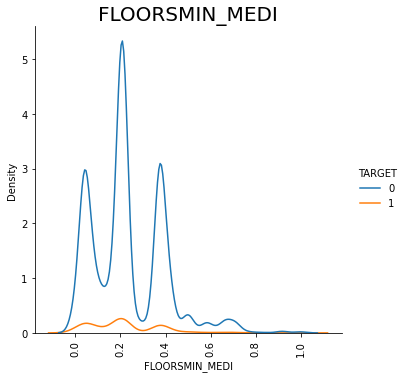

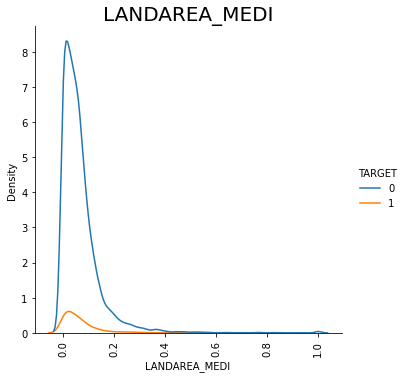

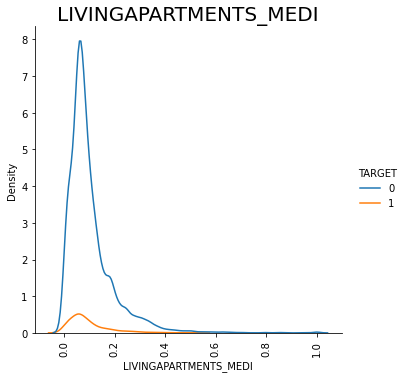

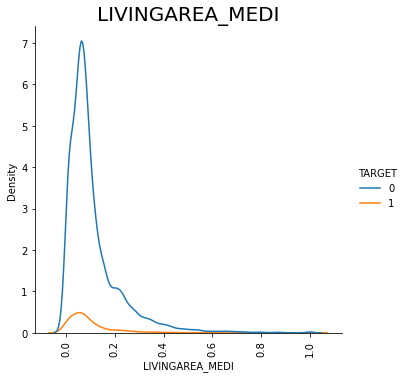

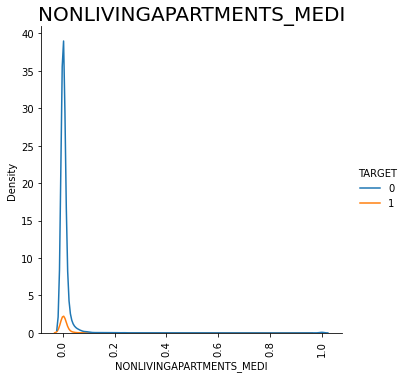

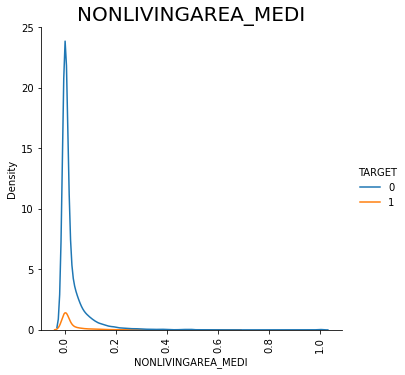

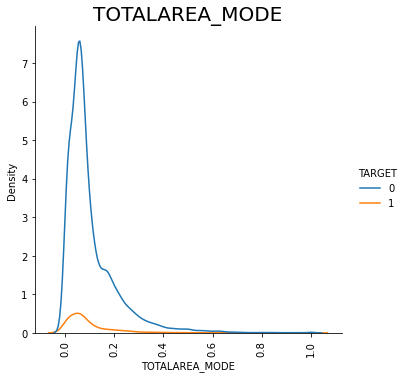

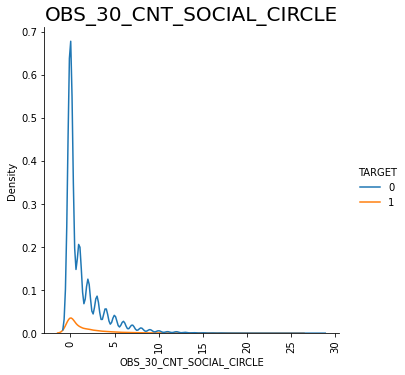

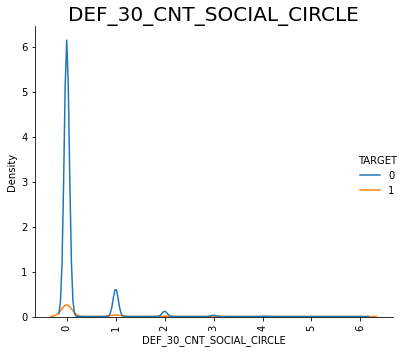

In [41]:
#numeric plots with 'hue'


plt.figure(figsize=(30,20))
cols=['LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE']
it=1
for i in cols:
    #plt.subplot(10,2,it)
    sns.displot(data=df, x=i, hue='TARGET',kind='kde')
    plt.title(i,fontsize=20)
    plt.xticks(rotation=90)
    
    it+=1
    
plt.tight_layout()
plt.show()

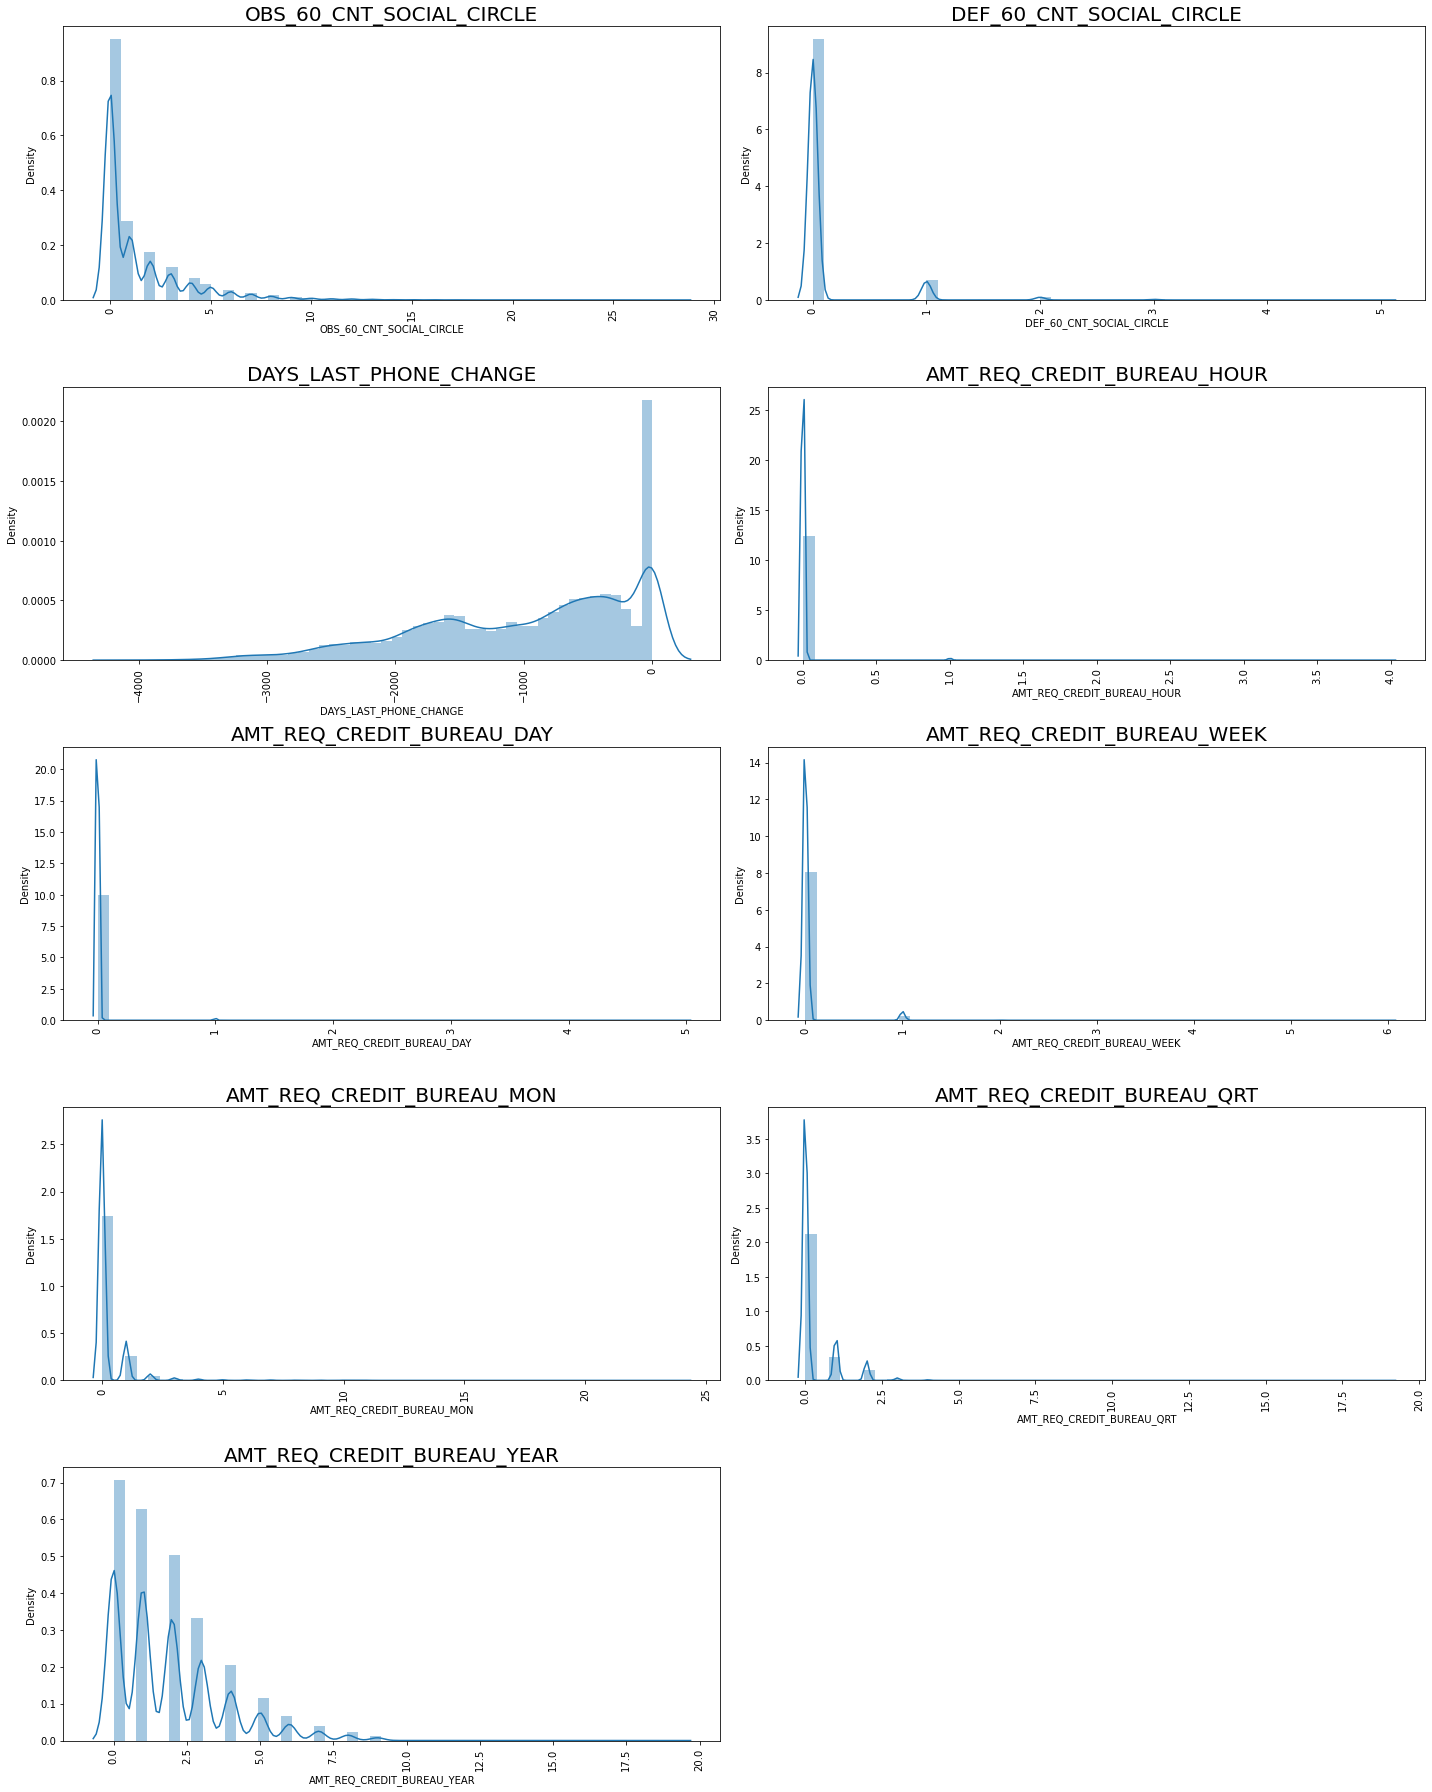

In [42]:
#numeric plots without 'hue'

plt.figure(figsize=(20,25))
cols=['OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
it=1
for i in cols:
    plt.subplot(5,2,it)
    sns.distplot(df[i])
    plt.title(i,fontsize=20)
    plt.xticks(rotation=90)
    it+=1
    
plt.tight_layout()
plt.show()

<Figure size 2160x1440 with 0 Axes>

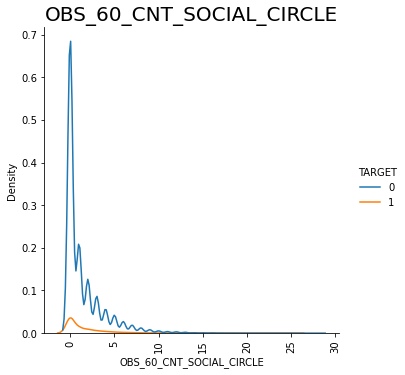

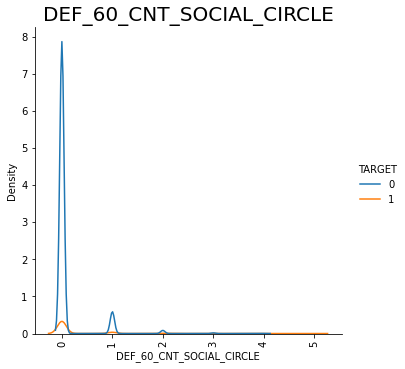

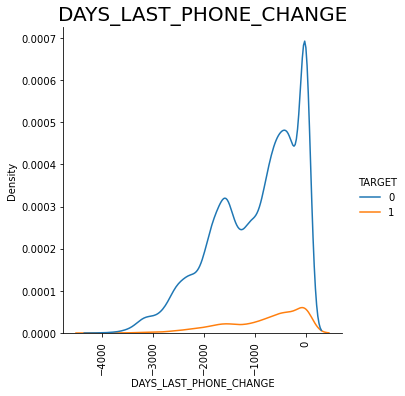

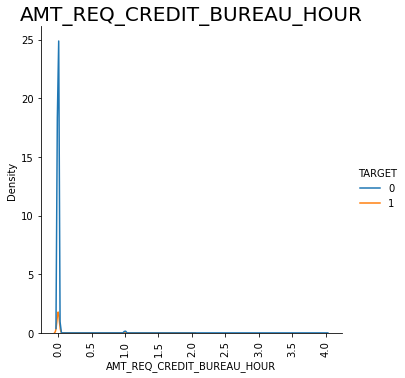

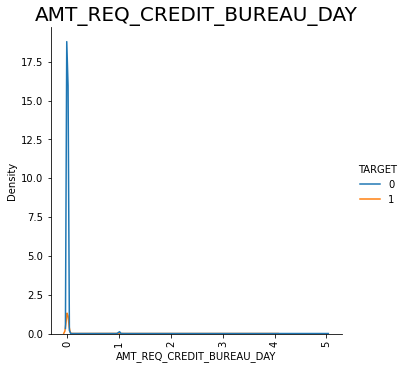

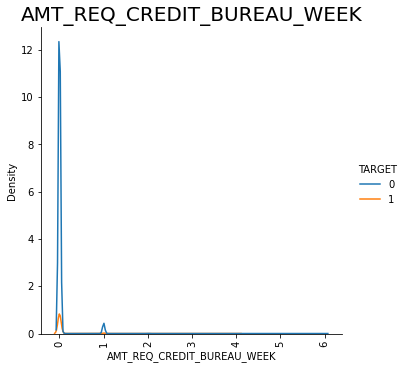

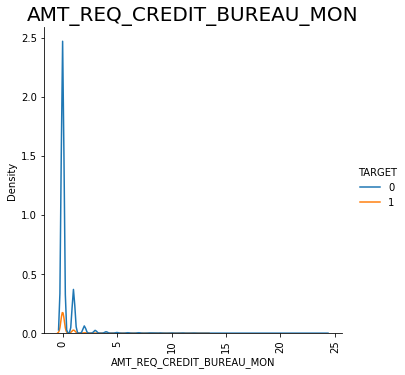

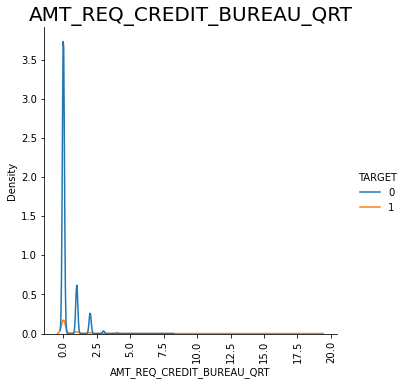

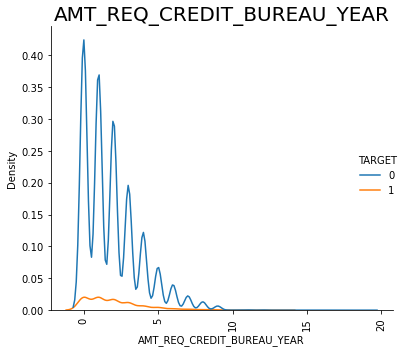

In [43]:
#numeric plots with 'hue'


plt.figure(figsize=(30,20))
cols=['OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
it=1
for i in cols:
    sns.displot(data=df, x=i, hue='TARGET',kind='kde')
    plt.title(i,fontsize=20)
    plt.xticks(rotation=90)
    
    it+=1
    
plt.tight_layout()
plt.show()

In [44]:
skew_l = df[num_col].skew()
kurt_l = df[num_col].kurt()

pd.DataFrame({'Skew':skew_l, 'Kurt':kurt_l })

Skew        Kurt
CNT_CHILDREN                   2.234343   15.491754
AMT_INCOME_TOTAL               6.204970  125.314471
AMT_CREDIT                     1.234574    1.899969
AMT_ANNUITY                    1.542073    7.114614
AMT_GOODS_PRICE                1.332917    2.300923
REGION_POPULATION_RELATIVE     1.497425    3.288972
DAYS_BIRTH                    -0.120203   -1.050183
DAYS_EMPLOYED                  1.670776    0.793092
DAYS_REGISTRATION             -0.574678   -0.374738
DAYS_ID_PUBLISH                0.360686   -1.100517
OWN_CAR_AGE                    2.756308    9.229763
CNT_FAM_MEMBERS                1.098198    5.312568
HOUR_APPR_PROCESS_START       -0.039049   -0.190563
EXT_SOURCE_1                  -0.076843   -0.954987
EXT_SOURCE_2                  -0.804498   -0.245100
EXT_SOURCE_3                  -0.415938   -0.666088
APARTMENTS_AVG                 2.555906   10.734254
BASEMENTAREA_AVG               3.354365   23.777410
YEARS_BEGINEXPLUATATION_AVG  -15.653974  251.311718
YEARS_BUILD_AVG               -0.987500    4.671200
COMMONAREA_AVG                 5.235180   42.303986
ELEVATORS_AVG                  2.450878    8.092566
ENTRANCES_AVG                  2.310130   10.986445
FLOORSMAX_AVG                  1.197664    2.311294
FLOORSMIN_AVG                  0.927889    1.298256
LANDAREA_AVG                   4.418383   34.296972
LIVINGAPARTMENTS_AVG           2.919474   15.272160
LIVINGAREA_AVG                 2.775835   11.642759
NONLIVINGAPARTMENTS_AVG       15.625239  281.798583
NONLIVINGAREA_AVG              6.209085   59.172897
APARTMENTS_MODE                2.616751   11.021432
BASEMENTAREA_MODE              3.281005   22.411179
YEARS_BEGINEXPLUATATION_MODE -15.079045  230.023726
YEARS_BUILD_MODE              -1.061044    5.205655
COMMONAREA_MODE                5.483100   46.532561
ELEVATORS_MODE                 2.565644    8.854846
ENTRANCES_MODE                 2.311656   10.883468
FLOORSMAX_MODE                 1.221394    2.462669
FLOORSMIN_MODE                 0.922900    1.240724
LANDAREA_MODE                  4.391865   33.419461
LIVINGAPARTMENTS_MODE          2.869665   13.950814
LIVINGAREA_MODE                2.821009   11.632760
NONLIVINGAPARTMENTS_MODE      16.283883  301.677387
NONLIVINGAREA_MODE             6.062368   55.535802
APARTMENTS_MEDI                2.559325   10.649393
BASEMENTAREA_MEDI              3.369111   23.911237
YEARS_BEGINEXPLUATATION_MEDI -15.744115  253.531003
YEARS_BUILD_MEDI              -0.994823    4.759430
COMMONAREA_MEDI                5.249982   42.344407
ELEVATORS_MEDI                 2.465291    8.152291
ENTRANCES_MEDI                 2.302321   10.898097
FLOORSMAX_MEDI                 1.219486    2.404985
FLOORSMIN_MEDI                 0.932853    1.298413
LANDAREA_MEDI                  4.338943   32.946635
LIVINGAPARTMENTS_MEDI          2.899466   14.897858
LIVINGAREA_MEDI                2.761143   11.349093
NONLIVINGAPARTMENTS_MEDI      15.726982  284.672500
NONLIVINGAREA_MEDI             6.123231   57.410824
TOTALAREA_MODE                 2.665127   10.794376
OBS_30_CNT_SOCIAL_CIRCLE       2.559849    9.392696
DEF_30_CNT_SOCIAL_CIRCLE       3.821520   18.451880
OBS_60_CNT_SOCIAL_CIRCLE       2.562136    9.391340
DEF_60_CNT_SOCIAL_CIRCLE       4.365965   23.770917
DAYS_LAST_PHONE_CHANGE        -0.706755   -0.332135
AMT_REQ_CREDIT_BUREAU_HOUR    15.219077  319.751018
AMT_REQ_CREDIT_BUREAU_DAY     22.551580  708.082203
AMT_REQ_CREDIT_BUREAU_WEEK     8.314399  117.037150
AMT_REQ_CREDIT_BUREAU_MON      8.480700  104.954691
AMT_REQ_CREDIT_BUREAU_QRT      3.283107   31.102829
AMT_REQ_CREDIT_BUREAU_YEAR     1.266127    2.033210

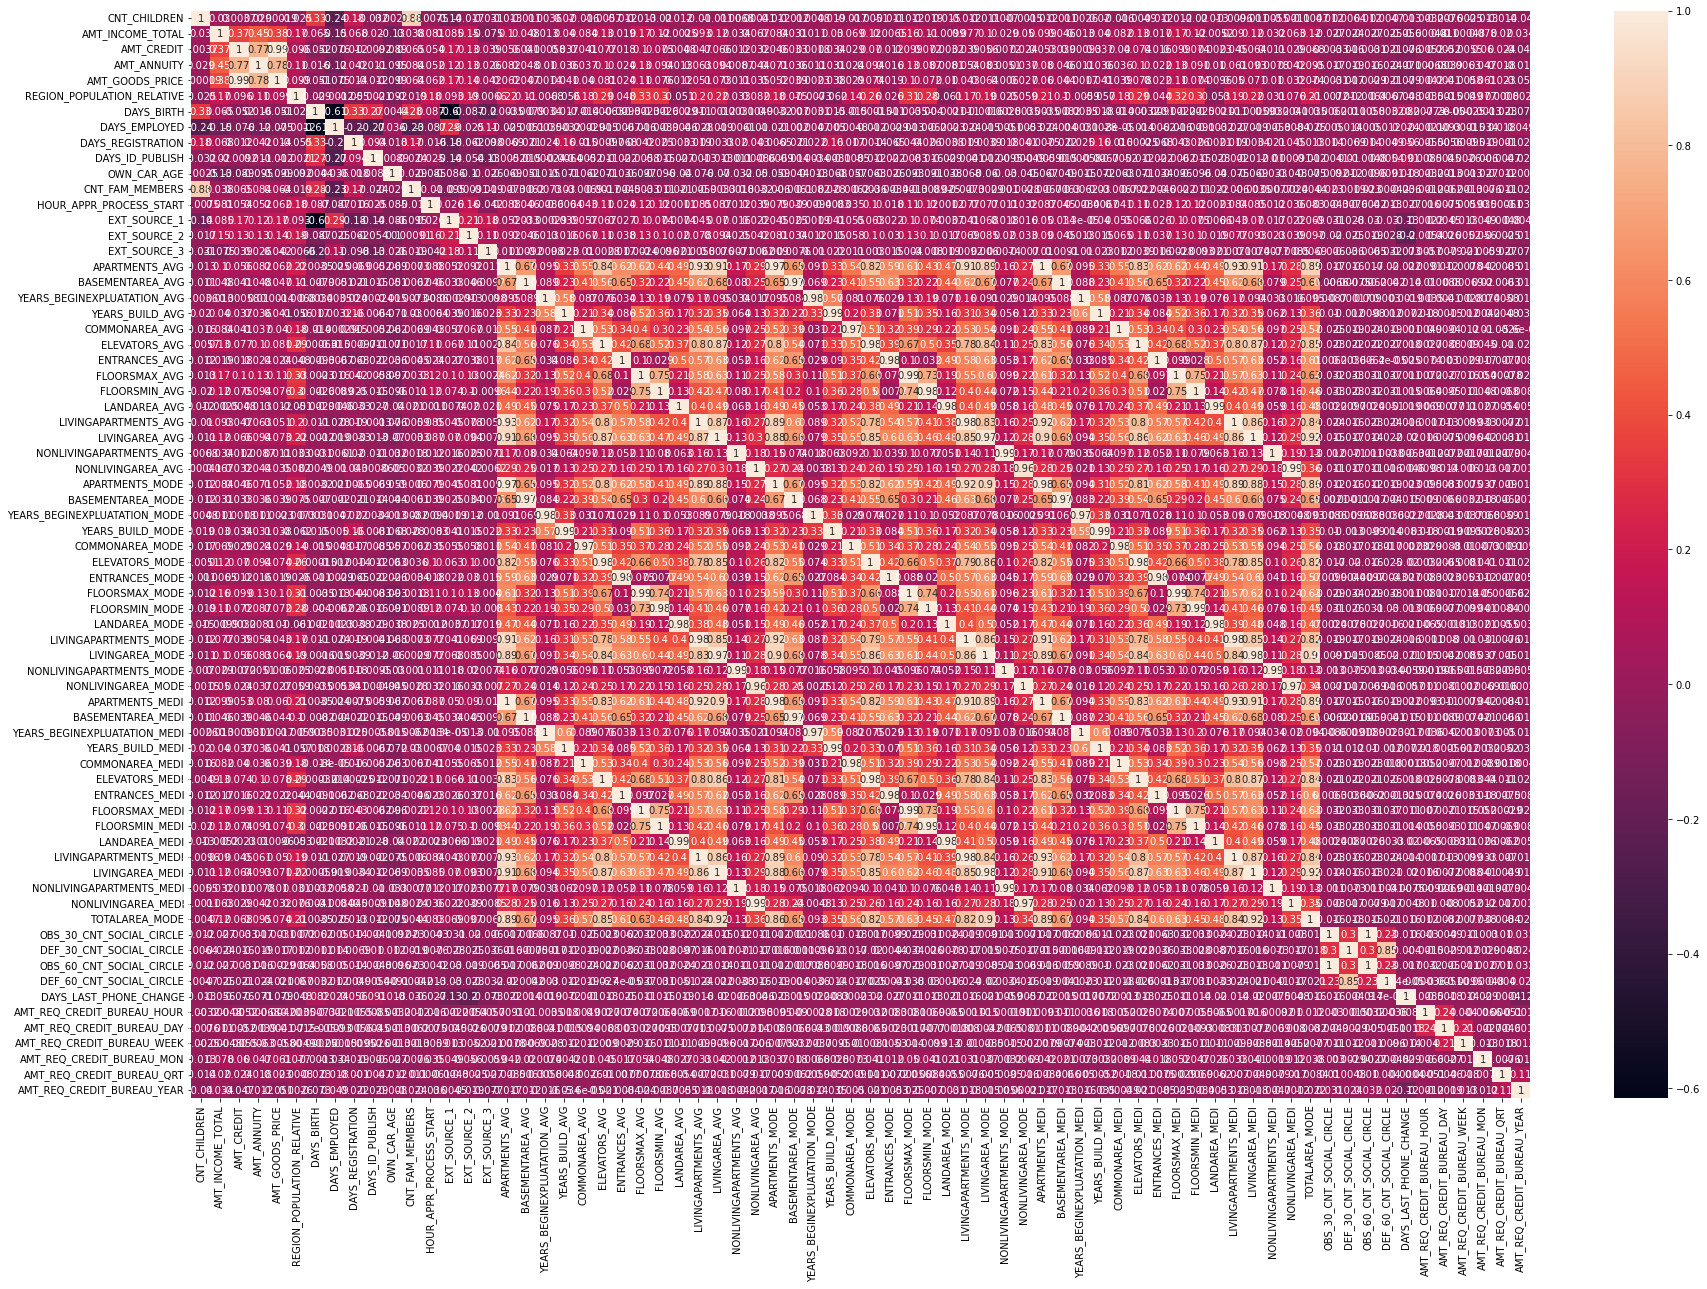

In [45]:
plt.figure(figsize=(30,20))

sns.heatmap(df[num_col].corr(), annot=True)
plt.show()

In [46]:
df[num_col].corr().T

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                      1.000000          0.030376    0.003654   
AMT_INCOME_TOTAL                  0.030376          1.000000    0.368435   
AMT_CREDIT                        0.003654          0.368435    1.000000   
AMT_ANNUITY                       0.028912          0.449866    0.770123   
AMT_GOODS_PRICE                   0.000185          0.375652    0.987002   
REGION_POPULATION_RELATIVE       -0.024843          0.174716    0.095895   
DAYS_BIRTH                        0.327408          0.064571   -0.052108   
DAYS_EMPLOYED                    -0.239755         -0.152305   -0.076217   
DAYS_REGISTRATION                 0.180008          0.067942    0.012406   
DAYS_ID_PUBLISH                  -0.031825          0.020289   -0.009191   
OWN_CAR_AGE                       0.002524         -0.128214   -0.088630   
CNT_FAM_MEMBERS                   0.879694          0.038447    0.064537   
HOUR_APPR_PROCESS_START          -0.007457          0.080570    0.053684   
EXT_SOURCE_1                     -0.136748          0.084955    0.166402   
EXT_SOURCE_2                     -0.016972          0.150640    0.130582   
EXT_SOURCE_3                     -0.030885         -0.075234    0.038788   
APARTMENTS_AVG                   -0.012865          0.102103    0.055577   
BASEMENTAREA_AVG                 -0.011360          0.048362    0.041378   
YEARS_BEGINEXPLUATATION_AVG       0.003568          0.012535    0.000579   
YEARS_BUILD_AVG                   0.019735          0.040032    0.036582   
COMMONAREA_AVG                   -0.016462          0.084355    0.040759   
ELEVATORS_AVG                    -0.005728          0.134451    0.076531   
ENTRANCES_AVG                    -0.011672          0.018635    0.018057   
FLOORSMAX_AVG                    -0.013058          0.171771    0.100574   
FLOORSMIN_AVG                    -0.019955          0.120007    0.075430   
LANDAREA_AVG                      0.011978         -0.002498    0.004809   
LIVINGAPARTMENTS_AVG             -0.009964          0.093230    0.046905   
LIVINGAREA_AVG                   -0.010951          0.122633    0.066098   
NONLIVINGAPARTMENTS_AVG           0.006835          0.034215    0.012401   
NONLIVINGAREA_AVG                 0.000406          0.066842    0.032146   
APARTMENTS_MODE                  -0.012107          0.083778    0.045746   
BASEMENTAREA_MODE                -0.011860          0.030769    0.033159   
YEARS_BEGINEXPLUATATION_MODE      0.004810          0.011496    0.001768   
YEARS_BUILD_MODE                  0.018694          0.030498    0.034157   
COMMONAREA_MODE                  -0.017177          0.068691    0.028902   
ELEVATORS_MODE                   -0.005121          0.119245    0.069574   
ENTRANCES_MODE                   -0.011482          0.006529    0.011948   
FLOORSMAX_MODE                   -0.011579          0.161979    0.098894   
FLOORSMIN_MODE                   -0.018624          0.110468    0.071599   
LANDAREA_MODE                     0.014947         -0.009869    0.003228   
LIVINGAPARTMENTS_MODE            -0.012057          0.077326    0.039045   
LIVINGAREA_MODE                  -0.011462          0.104645    0.056115   
NONLIVINGAPARTMENTS_MODE          0.007048          0.029418    0.007215   
NONLIVINGAREA_MODE               -0.001492          0.050482    0.024496   
APARTMENTS_MEDI                  -0.012083          0.098929    0.052980   
BASEMENTAREA_MEDI                -0.011001          0.046138    0.038686   
YEARS_BEGINEXPLUATATION_MEDI      0.002586          0.012853    0.000931   
YEARS_BUILD_MEDI                  0.019924          0.040176    0.036537   
COMMONAREA_MEDI                  -0.015884          0.082298    0.039772   
ELEVATORS_MEDI                   -0.004877          0.131390    0.073740   
ENTRANCES_MEDI                   -0.011538          0.016580    0.015846   
FLOORSMAX_MEDI                   -0.012454          0.170596    0.099227   
FL

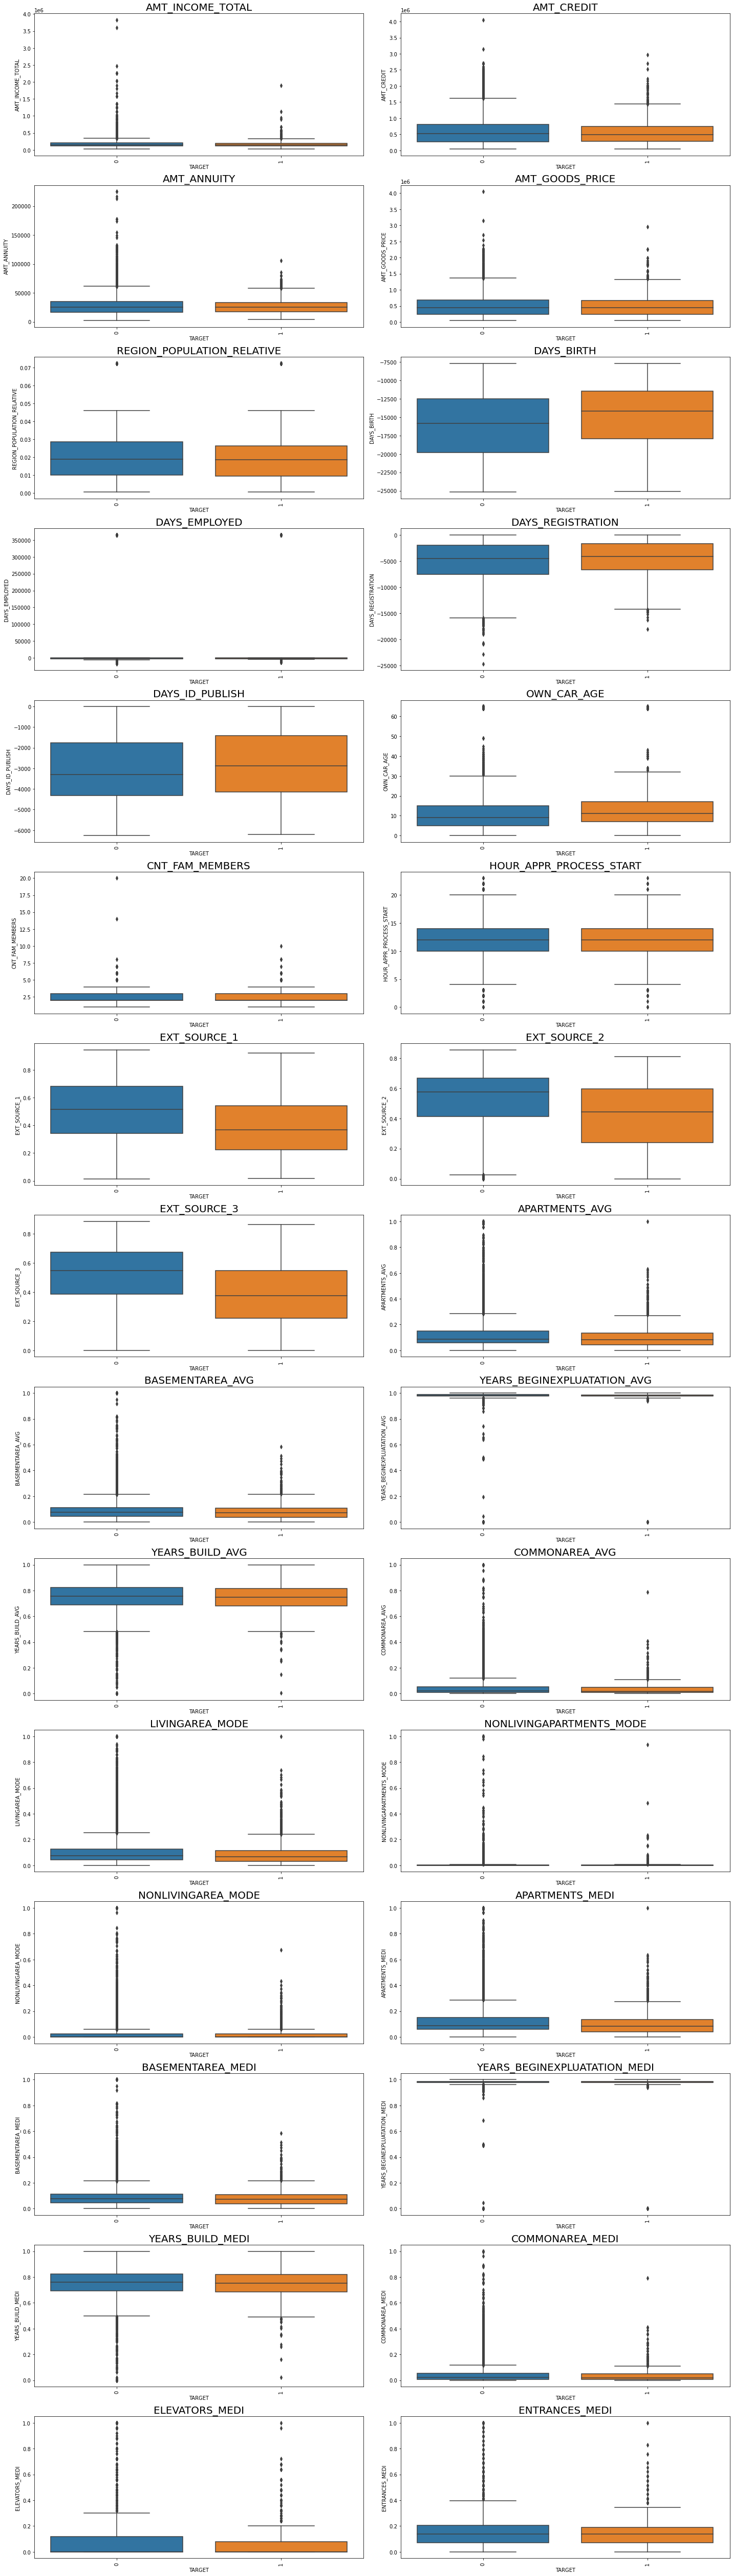

In [47]:
plt.figure(figsize=(20,70))
cols=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
     'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI','ENTRANCES_MEDI']
it=1
for i in cols:
    plt.subplot(15,2,it)
    sns.boxplot(data=df, y=i, x='TARGET')
    plt.title(i,fontsize=20)
    plt.xticks(rotation=90)
    it+=1
    
plt.tight_layout()
plt.show()

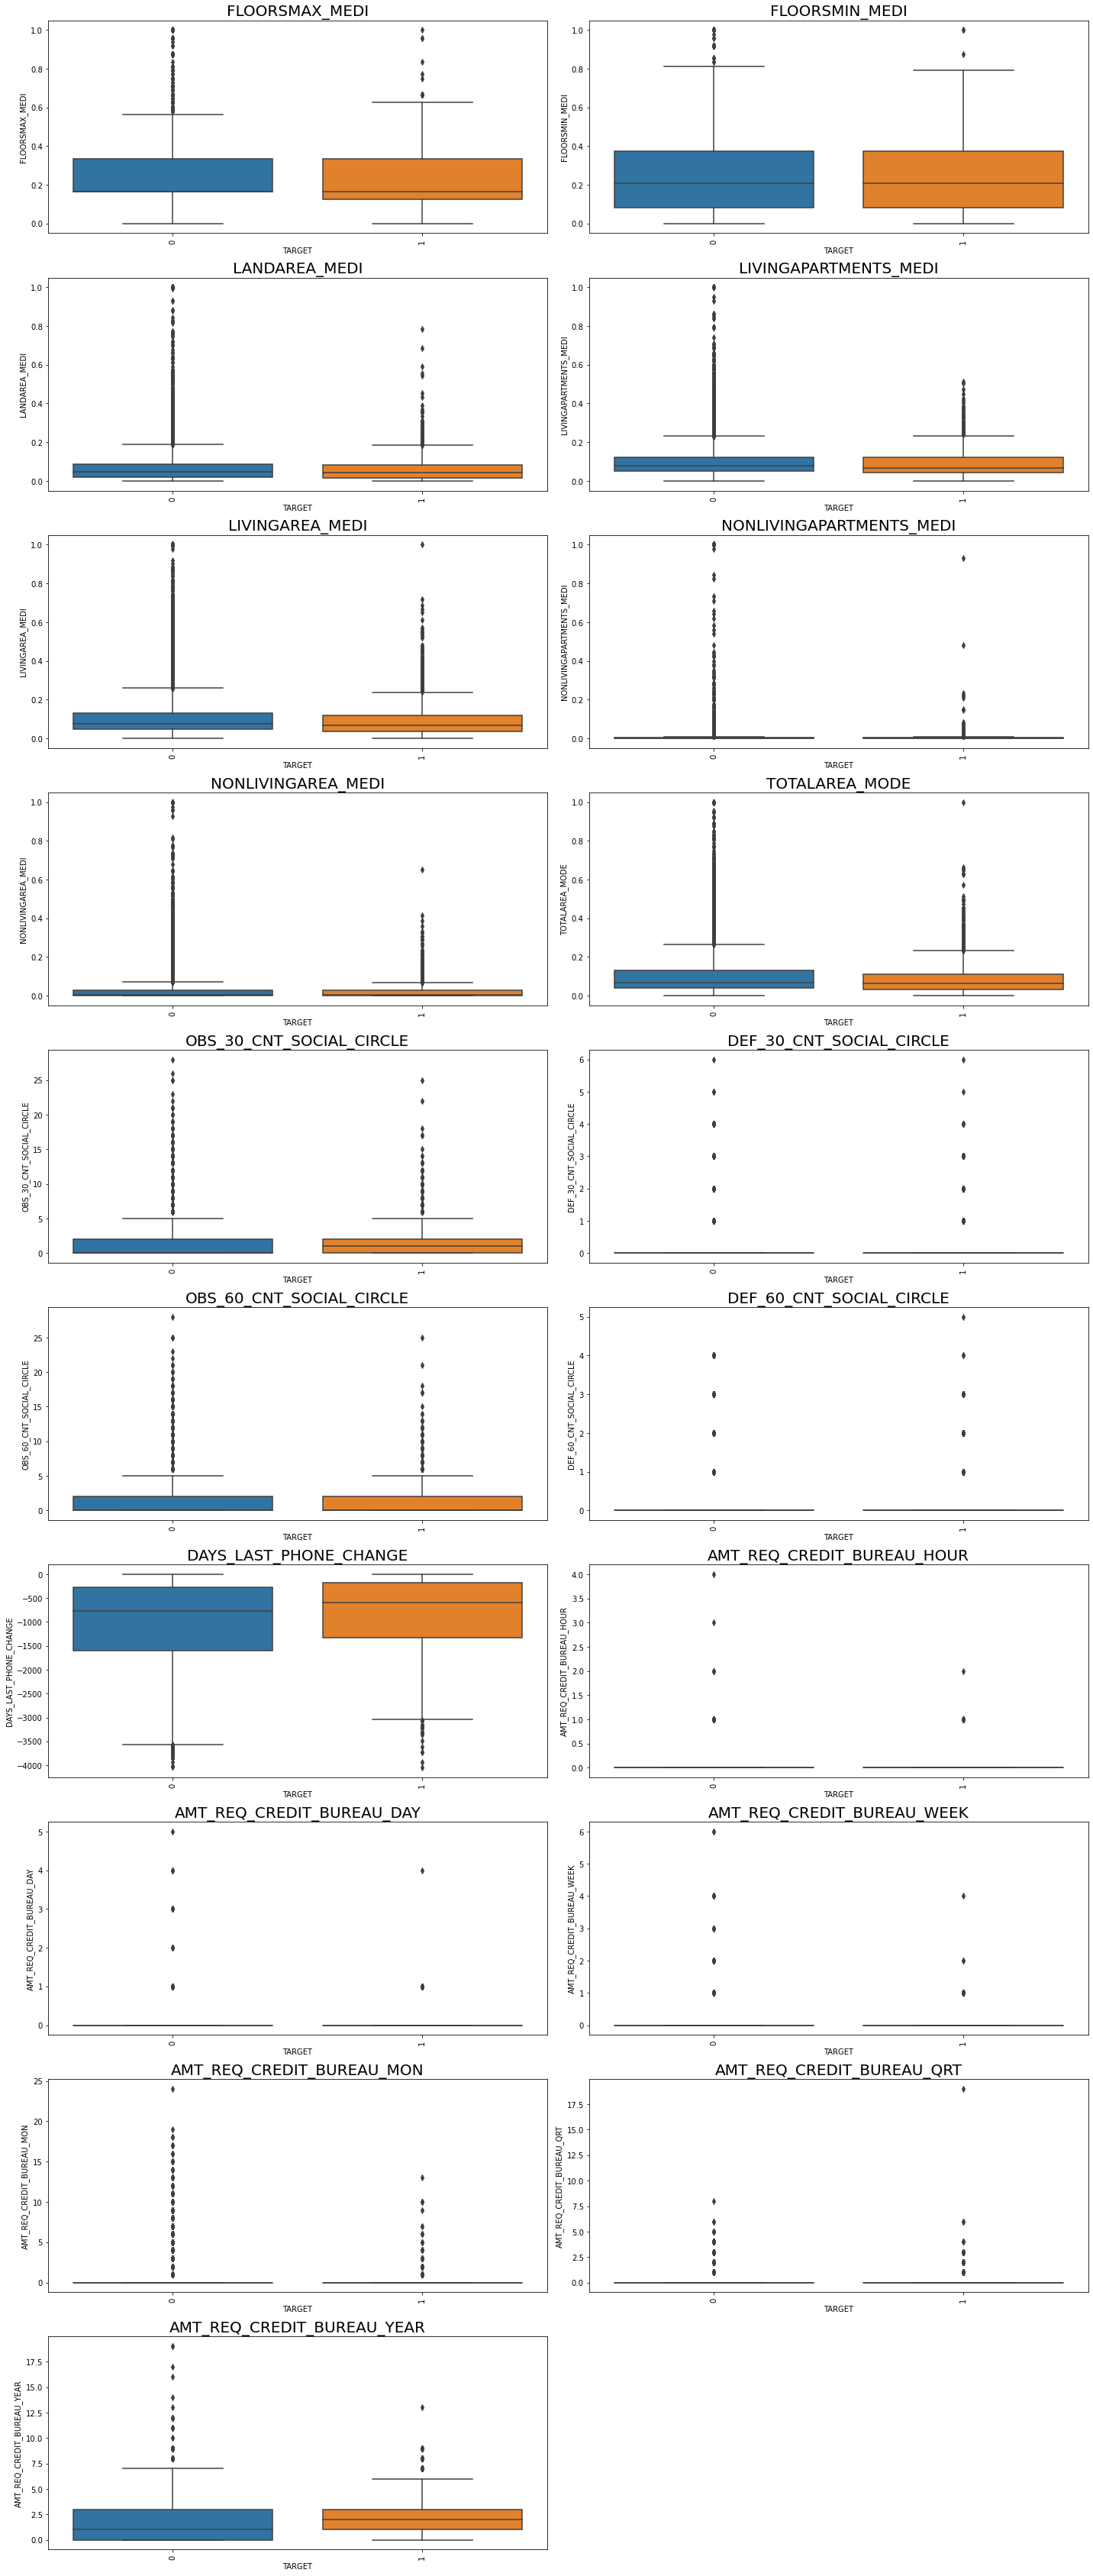

In [48]:
plt.figure(figsize=(20,70))
cols=[ 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
      'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
it=1
for i in cols:
    plt.subplot(15,2,it)
    sns.boxplot(data=df, y=i, x='TARGET')
    plt.title(i,fontsize=20)
    plt.xticks(rotation=90)
    it+=1
    
plt.tight_layout()
plt.show()

In [49]:
### 2 categories, 1 numerical, with hue and col='TARGET'

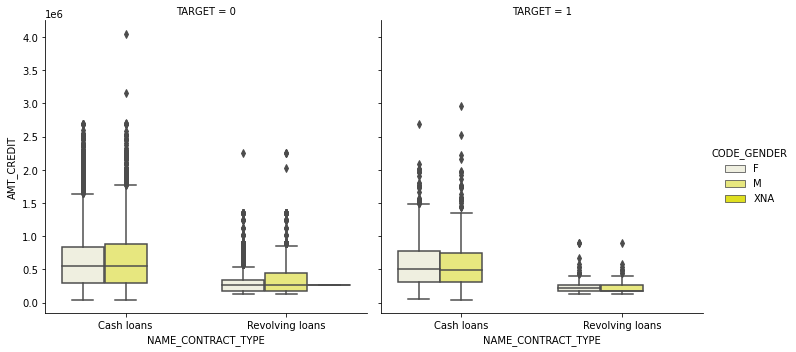

In [50]:
sns.catplot( x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', hue='CODE_GENDER', col='TARGET', data=df, kind='box',color='yellow')

### Bivariate Analysis: AMT_CREDIT vs NAME_INCOME_TYPE

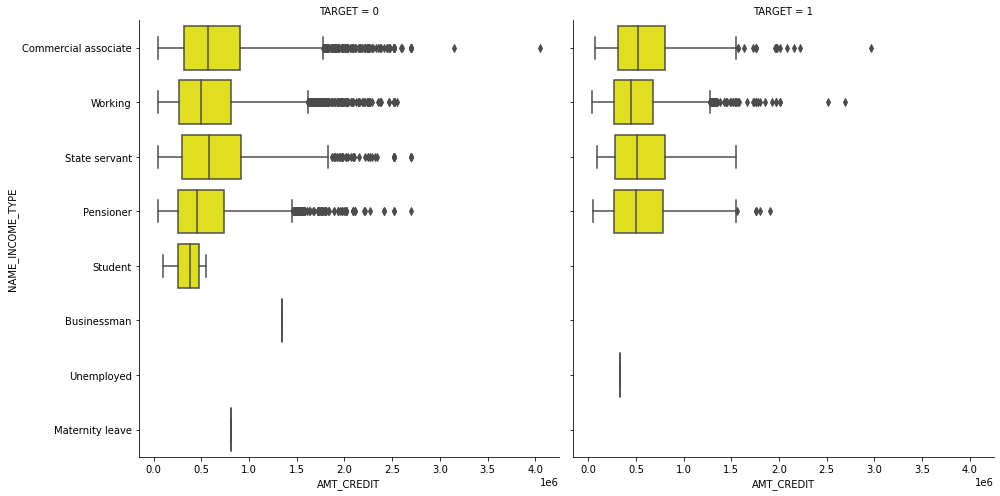

In [51]:
sns.catplot(x="AMT_CREDIT", y="NAME_INCOME_TYPE", col="TARGET",data=df,color = "yellow",kind="box", height=7)
plt.show()

### Selecting significant Categorical variables:

In [52]:
df_info.shape

(121, 3)

In [53]:
df_info.head()

dtypes  null_count  nuniques
TARGET               int64           0         2
NAME_CONTRACT_TYPE  object           0         2
CODE_GENDER         object           0         3
FLAG_OWN_CAR        object           0         2
FLAG_OWN_REALTY     object           0         2

In [54]:
num_cat_col = df_info[(df_info['dtypes']!='object')&(df_info['nuniques']<4)].index
num_col = df_info[(df_info['dtypes']!='object')&(df_info['nuniques']>=4)].index
cat_col = df_info[df_info['dtypes']=='object'].index
cat_col = list(num_cat_col) + list(cat_col)

In [58]:
import scipy


In [59]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

In [60]:
l = []
alpha=0.05
for col in cat_col:
    contingency_table = pd.crosstab(df[col], df['TARGET'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(col, 'p-value:', p)
    
    if p>alpha/2:
        l.append((col,1))
    else:
        l.append((col,0))

TARGET p-value: 0.0
FLAG_MOBIL p-value: 1.0
FLAG_EMP_PHONE p-value: 8.078914271052647e-17
FLAG_WORK_PHONE p-value: 4.91330105258722e-07
FLAG_CONT_MOBILE p-value: 0.19294215382596128
FLAG_PHONE p-value: 5.931742889748062e-10
FLAG_EMAIL p-value: 0.31005867253540775
REGION_RATING_CLIENT p-value: 1.587114773200864e-33
REGION_RATING_CLIENT_W_CITY p-value: 4.566609976806474e-33
REG_REGION_NOT_LIVE_REGION p-value: 0.004737895195752601
REG_REGION_NOT_WORK_REGION p-value: 0.020351159833564968
LIVE_REGION_NOT_WORK_REGION p-value: 0.7054045266360083
REG_CITY_NOT_LIVE_CITY p-value: 9.21046967131961e-15
REG_CITY_NOT_WORK_CITY p-value: 2.3296881495827623e-22
LIVE_CITY_NOT_WORK_CITY p-value: 2.9145429772579788e-09
FLAG_DOCUMENT_2 p-value: 0.7522087648012216
FLAG_DOCUMENT_3 p-value: 8.278233758310468e-15
FLAG_DOCUMENT_4 p-value: 1.0
FLAG_DOCUMENT_5 p-value: 0.5109939806389077
FLAG_DOCUMENT_6 p-value: 2.079135997061157e-08
FLAG_DOCUMENT_7 p-value: 0.8815903374730921
FLAG_DOCUMENT_8 p-value: 0.757646658

In [61]:
sig_cat_col = [i[0] for i in l if i[1]==0]
print(sig_cat_col)

['TARGET', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_16', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'WALLSMATERIAL_MODE']


In [62]:
print('Length of "cat_col":', len(cat_col))
print('Length of "sig_cat_col":', len(sig_cat_col))


Length of "cat_col": 51
Length of "sig_cat_col": 25


In [ ]:
#### category vs category:

<AxesSubplot:xlabel='REG_REGION_NOT_WORK_REGION', ylabel='FLAG_EMP_PHONE'>

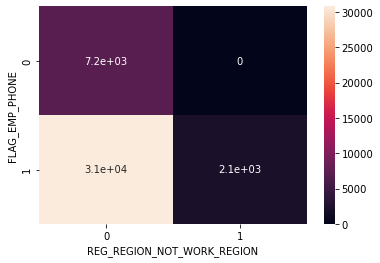

In [72]:
sns.heatmap(pd.crosstab(df['FLAG_EMP_PHONE'], df['REG_REGION_NOT_WORK_REGION']), annot=True)

<AxesSubplot:xlabel='FLAG_EMP_PHONE', ylabel='count'>

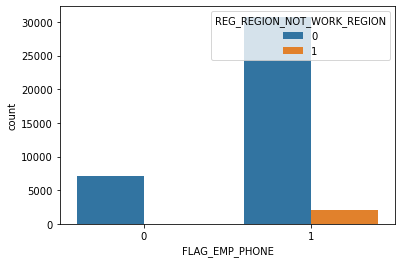

In [69]:
sns.countplot(data=df, x='FLAG_EMP_PHONE',hue='REG_REGION_NOT_WORK_REGION')

In [73]:
#pd.crosstab(df['FLAG_EMP_PHONE'],df['REG_REGION_NOT_WORK_REGION'])

In [ ]:
CODE_GENDER